In [1]:
import pandas as pd
import numpy as np

import pickle

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

In [2]:
pd.options.display.max_rows = 6
pd.options.display.max_columns = 30

In [3]:
df = pd.read_pickle("df_raw.pkl")

In [4]:
df

,ID,desg,desi,desr,desz,Xaxis
0,SN554563,"[[0.0, 18.98, 10.49], [1.985000000000582, 0.89...","[[0.03200000000651926, 8.001, 9.313], [10.9610...","[[2.0, 5.875, 2.431], [10.121000000006461, 6.9...","[[15.993000000002212, 1.763, 6.543], [29.95700...","[0.0, 1.4326868686868988, 2.8653737373737975, ..."
1,SN454964,"[[0.0, 4.359, 6.2], [4.9799999999959255, 33.82...","[[0.010999999998603016, 3.629, 6.148], [4.9959...","[[0.004000000000814907, 0.8701, 3.584], [14.21...","[[5.004000000000815, 4.406, 7.695], [24.139999...","[0.0, 1.2527575757575864, 2.505515151515173, 3..."
2,SN537864,"[[0.0, 0.4987, 4.764], [11.969000000004598, 8....","[[4.105999999999767, 1.357, 3.683], [13.090000...","[[0.008000000001629815, 3.18, 2.13], [13.07899...","[[3.0750000000043656, 1.838, 3.729], [4.137000...","[0.0, 1.1715252525252502, 2.3430505050505004, ..."
...,...,...,...,...,...,...
21314,SN51813,"[[14.859000000004016, 11.64, 11.89], [30.91799...","[[12.984000000004016, 5.321, 4.986], [22.88599...","[[0.0, 1.53, 1.444], [14.86699999999837, 2.602...","[[2.014999999999418, 3.934, 3.402], [13.014999...","[0.0, 0.7759595959595931, 1.5519191919191861, ..."
21315,SN599115,"[[0.0, 3.229, 7.693], [10.014999999999418, 1.1...","[[0.027000000001862645, 8.224, 5.11], [3.01099...","[[1.0, 0.9777, 3.85], [2.0429999999978463, 0.4...","[[1.0429999999978463, 2.444, 4.848], [2.085999...","[0.0, 1.2428181818181518, 2.4856363636363037, ..."
21316,SN308423,"[[29.875, 4.829, 11.89], [53.88699999999517, 9...","[[0.0, 2.278, 4.54], [7.995999999999185, 3.879...","[[2.069999999999709, 0.06183, 1.853], [23.0239...","[[0.01999999999679858, 6.346, 3.061], [30.0159...","[0.0, 0.9276363636363202, 1.8552727272726404, ..."


In [6]:
def gplc(index,x, y, yerr, npoints = 100, n_restarts_optimizer = 100):
    print(index)
    
    X = x.reshape(-1, 1)#df.loc[:, x].values.reshape(-1, 1)
    y = y#df.loc[:, y].values
    yerr = yerr#df.loc[:, yerr].values
    
    Xmin, Xmax = X.min(), X.max()
    vary = y.var()
    
    i = y > 0
    
    yerr = yerr[i]/y[i]
    y = np.log(y[i])
    X = X[i]

    const = ConstantKernel(vary, constant_value_bounds=(1e-5, 2*vary))
    rbf = RBF(length_scale = .5*Xmax, length_scale_bounds=(1e-05, Xmax))

    kernel = const * rbf
    
    GPR = GaussianProcessRegressor(kernel = kernel, alpha = yerr**2, n_restarts_optimizer = n_restarts_optimizer)
    
    GPR.fit(X, y)
    
    nX = np.linspace(Xmin, Xmax, npoints).reshape(-1, 1)
    
    ny, cov = GPR.predict(nX, return_cov=True)
    
    expy = np.exp(ny)
    # tempo, resultado, e a matriz de covariancia 
    return nX.ravel(), expy, (expy * expy.reshape(-1, 1)) * cov

In [9]:
mask = (df.desg.str.len() > 1) & (df.desi.str.len() > 1) & (df.desr.str.len() > 1) & (df.desz.str.len() > 1) 
df = df.loc[mask]

#df['desg_GP'] = df.apply(lambda df: gplc(df.ID, df.desg[:,0],df.desg[:,1],df.desg[:,2]), axis=1) 
#df.to_pickle("./df_GP_scikit_desg.pkl")
#df['desi_GP'] = df.apply(lambda df: gplc(df.ID, df.desi[:,0],df.desi[:,1],df.desi[:,2]), axis=1) 
#df.to_pickle("./df_GP_scikit_desi.pkl")
#
#df['desr_GP'] = df.apply(lambda df: gplc(df.ID, df.desr[:,0],df.desr[:,1],df.desr[:,2]), axis=1) 
#df.to_pickle("./df_GP_scikit_desr.pkl")

df['desz_GP'] = df.apply(lambda df: gplc(df.ID, df.desz[:,0],df.desz[:,1],df.desz[:,2]), axis=1) 
df.to_pickle("./df_GP_scikit_desz.pkl")

SN554563
SN454964
SN537864
SN528418
SN11302
SN156890
SN713955
SN552152
SN289826
SN726687
SN830513
SN148067
SN820066
SN375400
SN70735
SN539245
SN173484
SN262806
SN723279
SN108768
SN358091
SN373565
SN349991
SN363599
SN738095
SN148312
SN493590
SN392794
SN838450
SN880665
SN278946
SN248364
SN687184
SN405878
SN119275
SN431592
SN370459
SN98880
SN328341
SN431393
SN108685
SN763454
SN689322
SN613176
SN368104
SN213064
SN625812
SN834119
SN292875
SN850408
SN479396
SN47728
SN636055
SN175935
SN529789
SN891001
SN445043
SN341885
SN709171
SN575992
SN729156
SN668197
SN369484
SN831112
SN681143
SN766474
SN845648
SN127549
SN805984
SN801724
SN209160
SN134229
SN275629
SN735318
SN800551
SN485017
SN794786
SN350188
SN818077
SN694961
SN709355
SN274275
SN487796
SN317636
SN212288
SN344404
SN293713
SN112925


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN553039
SN751232
SN525134
SN211808
SN347767
SN668078
SN651455
SN472981
SN339449
SN597841
SN756653
SN867133
SN236099
SN168280
SN50846
SN784751
SN539323
SN626445
SN638387
SN148973
SN10126
SN39126
SN224473
SN102746
SN468946
SN386268
SN186320
SN867641
SN138541
SN298723
SN537760
SN659970
SN215915
SN168004
SN55196
SN672465
SN628763
SN671446
SN102614
SN482249
SN241079
SN109005
SN138995
SN623776
SN324250
SN414459
SN383603
SN399611
SN879123
SN236527
SN611292
SN637546
SN191105
SN82808
SN196493
SN882574
SN506484
SN266781
SN440666
SN685756
SN387162
SN206274
SN235374
SN170497
SN10148
SN329509
SN761079
SN838013
SN794535
SN784460
SN770362
SN808280
SN353655
SN802826
SN43808
SN38970
SN643332
SN21378
SN141977
SN156614
SN65282
SN737177
SN834353
SN752617
SN378444
SN69913
SN105556
SN164782
SN115021
SN128219
SN819458
SN129367
SN828703
SN123067
SN617916
SN301725
SN404318
SN692946
SN796738
SN608357
SN725979
SN543799
SN462151
SN320617
SN67886
SN95623
SN425030
SN406263
SN893173
SN827605
SN85779
SN484281
SN6924

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN365322
SN96917
SN783200
SN670876
SN230730
SN565
SN780017
SN890220
SN701842
SN116828
SN372498
SN516851
SN598969
SN877984
SN524629
SN227948
SN457490
SN519860
SN389406
SN218626
SN250560
SN356921
SN207514
SN683638
SN532850
SN188512
SN483839
SN109147
SN76375
SN849248
SN218330
SN339165
SN14629
SN455533
SN851343
SN551241
SN575197
SN454221
SN817716
SN643680
SN548753
SN738527
SN220264
SN872719
SN164805
SN289575
SN799948
SN210760
SN890764
SN183715
SN199309
SN217301
SN268760
SN869211
SN196362
SN685575
SN551519
SN89818
SN761757
SN563076


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN517297
SN495862
SN70326
SN623455
SN156794
SN83148
SN630468
SN895264
SN559435
SN133512
SN849036
SN110209
SN545647
SN37797
SN473475
SN620362
SN88660
SN473602
SN493409
SN238132
SN159816
SN824557
SN434280
SN439893
SN321163
SN642139
SN793153
SN497240
SN523441
SN538406
SN90174
SN388088
SN135375
SN49553
SN847285
SN876802
SN539446
SN328003
SN793968
SN70638
SN541719
SN818063
SN576545
SN696652
SN518654
SN841443
SN764583
SN235393
SN728313
SN641308
SN801164
SN522132
SN433800
SN7840
SN622600
SN745575
SN816877
SN551165
SN553964
SN312831
SN287738
SN49994
SN706201
SN416252
SN637684
SN323775
SN277003
SN159729
SN82590
SN300655
SN554958
SN258201
SN246248
SN407429
SN339729
SN503962
SN522955
SN635900
SN246810
SN399384
SN318376
SN221332
SN744573
SN58178
SN252029
SN678746
SN205564
SN834988
SN786733
SN194493
SN892022
SN645250
SN789100
SN127793
SN375734
SN79691
SN524418
SN358998
SN265758
SN843387
SN721558
SN316863
SN477850
SN679175
SN117798
SN871861
SN540433
SN314848
SN578301
SN618235
SN689889
SN244590
SN490

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN567244
SN611005
SN480613
SN522768
SN55270
SN32061
SN583670
SN527890
SN434937
SN324790
SN41523
SN406233
SN21452
SN451112
SN612420
SN91759
SN32067
SN611416
SN484159
SN484855
SN631416
SN895939
SN531120
SN394411
SN258016
SN666072
SN706056
SN157176
SN420712
SN338746
SN489524
SN495576
SN460759
SN706415
SN429541
SN372813
SN659836
SN766692
SN285046
SN257626
SN249198
SN630664
SN441738
SN31167
SN717369
SN745525
SN264614
SN372156
SN370329
SN40849
SN287172
SN857569
SN102370
SN82099
SN387315
SN638874
SN653759
SN723124
SN202847
SN344069
SN339421
SN401357
SN134743
SN37426
SN103923
SN789150
SN10956
SN475619
SN146513
SN609810
SN861923
SN266910
SN327240
SN803656
SN741966
SN194150
SN816491
SN501417
SN886726
SN549294
SN386274
SN766666
SN189344
SN180014
SN328438
SN745469
SN229152
SN672748
SN30647
SN869740
SN307673
SN500605
SN670609
SN514264
SN508259
SN204524
SN208146
SN743657
SN96055
SN827237
SN167217
SN718283
SN116349
SN212692
SN496206
SN117243
SN290680
SN592181
SN665075
SN246449
SN688266
SN307935
SN383

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN802246
SN33742
SN400692
SN607980
SN689541
SN278551
SN104218
SN530952
SN520710
SN669431
SN727349
SN418860
SN403661
SN769006
SN654701
SN408585
SN761455
SN286628
SN96706
SN489421
SN153886
SN139366
SN464483
SN535619
SN281209
SN780772
SN219941
SN841011
SN739446
SN61309
SN486291
SN898015
SN714759
SN308469
SN513064
SN672585
SN641898
SN168010
SN199613
SN814724
SN413333
SN54081
SN870078
SN683986
SN634663
SN606246
SN579195
SN843722
SN676090
SN87447
SN500551
SN307059
SN666525
SN709764
SN4973
SN55068
SN682827
SN603507
SN228013
SN811945
SN235557
SN786124
SN93954
SN464723
SN409258
SN94614
SN5090
SN707107
SN339786
SN702773
SN50829
SN852522
SN291209
SN59869
SN726906
SN758934
SN653577
SN471847
SN323773
SN398519
SN81595
SN499909
SN720452
SN373339
SN599890
SN820827
SN31240
SN373962
SN690961
SN454216
SN842523
SN884432
SN773241
SN646381
SN128535
SN830323
SN564861
SN96309
SN227630
SN828496
SN501595
SN467148
SN83295
SN759610
SN83128
SN356957
SN660044
SN868878
SN169236
SN773843
SN360782
SN541794
SN142888
SN

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN633773
SN550000
SN349071
SN177231
SN462679
SN414932
SN628050
SN740469
SN111243
SN308167
SN752240
SN34056
SN249976
SN377124
SN748492
SN428997
SN398856
SN684499
SN317979
SN132260
SN842021
SN734655
SN532719
SN858705
SN506154
SN668493
SN86821
SN45600
SN39488
SN141149
SN430181
SN293728
SN382888
SN874800
SN764289
SN682528
SN401966
SN588715
SN293498
SN117727
SN111544
SN143937
SN767186
SN569924
SN509890
SN285057
SN136273
SN364421
SN401057
SN510888
SN350670
SN100878
SN789282
SN793914
SN327904
SN161122
SN699798
SN465063
SN836939
SN799835
SN284176
SN397778
SN553488
SN365574
SN355754
SN79959
SN169049
SN777202
SN56807
SN498849
SN716132
SN852423
SN821836
SN640136
SN832717
SN225474
SN23196
SN868399
SN627606
SN345384
SN542401
SN880199
SN462011
SN367721
SN872032
SN407114
SN657375
SN634764
SN746135
SN823309
SN16742
SN887922
SN152463
SN235695
SN626399
SN669725
SN234688
SN311992
SN340713
SN281242
SN414991
SN288012
SN851682
SN694444
SN804401
SN812720
SN404212
SN862571
SN227048
SN178474
SN195206
SN17778
S

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN113477
SN441864
SN305966
SN494797
SN548251
SN53319
SN633196
SN570650
SN831491
SN202995
SN471912
SN616223
SN89676
SN321295
SN857542
SN88929
SN495375
SN781000
SN453384
SN17270
SN827331
SN555204
SN466080
SN303407
SN413506
SN46970
SN475707
SN30701
SN167290
SN558323
SN419354
SN185565
SN379058
SN459081
SN846060
SN99758
SN63664
SN325440
SN372246
SN663469
SN116029


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN507708
SN455544
SN44703
SN300845
SN345631
SN581757
SN877710
SN506252
SN111967
SN630391
SN408684
SN710587
SN138736
SN604549
SN709257
SN221730
SN841555
SN588123
SN338447
SN812089
SN583442
SN48665
SN301668
SN566164
SN726074
SN329572
SN111488
SN349982
SN540078
SN547441
SN64089
SN430238
SN296481
SN116167
SN118581
SN714411
SN393925
SN331518
SN556079
SN881711
SN872215
SN774480
SN597283
SN69239
SN710959
SN485500
SN346800
SN526766
SN678754
SN898744
SN332728
SN146429
SN90289
SN19
SN521111
SN354208
SN617776
SN422240
SN408028
SN313909
SN189671
SN834563
SN851551
SN830430
SN429499
SN801255
SN657832
SN104347
SN118280
SN147136
SN668750
SN66191
SN579214
SN541256
SN325194
SN17
SN496805
SN692503
SN602195
SN257527
SN570170
SN707413
SN730843
SN40482
SN506345
SN371140
SN846451
SN71333
SN633188
SN116771
SN574618
SN199257
SN525411
SN102293
SN425146
SN503066
SN590548
SN380686
SN576432
SN470626
SN388425
SN843709
SN241510
SN679414
SN592663
SN213574
SN862488
SN443754
SN327645
SN155581
SN856987
SN832208
SN251371

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN517271
SN744471
SN729452
SN651153
SN385308
SN48754
SN351351
SN738724
SN392456
SN625884
SN228318
SN751300
SN673644
SN646321
SN797332
SN690644
SN535115
SN861040
SN458122
SN864091
SN276796
SN158722
SN296342
SN645311
SN791998
SN549028
SN527177
SN813873
SN19473
SN414485
SN750753
SN372008
SN593833
SN869018
SN751263
SN333863
SN728454
SN493217
SN841737
SN239281
SN463986
SN314497
SN216959
SN211091
SN664342
SN741770
SN526548
SN648465
SN409874
SN625501
SN311255
SN899707
SN582059
SN656692
SN11963
SN856635
SN663373
SN778592
SN222027
SN313652
SN592012
SN663946
SN188225
SN557319
SN268736
SN453994
SN693506
SN85766
SN234053
SN705266
SN76550
SN695134
SN263095
SN494250
SN458865
SN548850
SN383315
SN457538
SN322125
SN398373
SN597330
SN790996
SN220705
SN722033
SN780226
SN583998
SN889104
SN275544
SN85682
SN248105
SN183363
SN369917
SN510852
SN573011
SN330415
SN422764
SN774691
SN25687
SN820068
SN351850
SN396175
SN723304
SN474591
SN140211
SN135917
SN249583
SN627544
SN598502
SN758258
SN732428
SN648994
SN122623

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN196675
SN328871
SN348648
SN510187
SN515310
SN644239
SN676369
SN539471
SN568193
SN711560
SN441061
SN197597
SN81907
SN437318
SN763904
SN410869
SN617922
SN255002
SN476269
SN486038
SN828794
SN240496
SN725910
SN514670
SN118817
SN461907
SN876896
SN591978
SN729813
SN186358
SN535726
SN739950
SN13742
SN27401
SN578841
SN499105
SN387579
SN491415
SN195173
SN407661
SN688784
SN852837
SN238455
SN735235
SN522011
SN30498
SN741782


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN625650
SN713962
SN690708
SN18421
SN762336
SN193074
SN413425
SN633935
SN26139
SN347166
SN521712
SN395094
SN530237
SN169212
SN29775
SN515839
SN214133
SN155990
SN49586
SN674003
SN629354
SN424460
SN255194
SN84882
SN395238
SN187419
SN678204
SN331455
SN105837
SN655673
SN690613
SN224642
SN582235
SN360034
SN425394
SN314324
SN163596
SN589091
SN142622
SN826734
SN53427
SN59590
SN402184
SN319509
SN329305
SN667468
SN867484
SN247846
SN484776
SN737521
SN288123
SN835976
SN422278
SN217181
SN238650
SN1152
SN643530
SN148837
SN624994
SN552460
SN252397
SN15052
SN17592
SN236083
SN886120
SN278415
SN488979
SN596743
SN322067
SN816097
SN867661
SN511804
SN495593
SN473858
SN378049
SN146515
SN819022
SN659554
SN335892
SN721983
SN21871
SN271807
SN147771
SN615826
SN322033
SN106864
SN698750
SN628949
SN760046
SN81070
SN526551
SN188285
SN272247
SN322226
SN720824
SN791356
SN208527
SN466378
SN106571
SN202535
SN396970
SN4052
SN157869
SN466683
SN242659
SN13649
SN205791
SN498144
SN457903
SN590458
SN129339
SN379212
SN110008

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN102158
SN786825
SN670423
SN124841
SN466664
SN647723
SN894089
SN459001
SN680428
SN447710
SN101801
SN485253
SN273829
SN770939
SN607705
SN355689
SN723791
SN268370
SN443042
SN769899
SN246798
SN286380
SN450624
SN820329
SN67052
SN489512
SN543061
SN480942
SN422790
SN878004
SN555201
SN283087
SN117179
SN636721
SN896566
SN731978
SN684951
SN148408
SN870944
SN369280
SN500940
SN10005
SN412969
SN214636
SN733730
SN112612
SN34633
SN37635
SN631606
SN549483
SN425967
SN762989
SN478001
SN147774
SN580539
SN823490
SN296903
SN479314
SN322970
SN222096
SN700896
SN38938
SN284304
SN655170
SN110278
SN177606
SN126254
SN88779
SN599434
SN253149
SN839922
SN326992
SN875581
SN449285
SN376856
SN407414
SN9262
SN561905
SN656459
SN379844
SN855477
SN107129
SN664168
SN286454
SN238436
SN868584
SN237642
SN114807
SN625085
SN15800
SN421860
SN274574
SN636148
SN812322
SN516165
SN866584
SN55127
SN369147
SN776849
SN394708
SN854947
SN69178
SN640304
SN323781
SN828037
SN763673
SN609346
SN758692
SN267776
SN85281
SN462586
SN189556
SN11

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN730862
SN127400
SN11742
SN107059
SN809543
SN69720
SN321384
SN489596
SN414130
SN313740
SN223704
SN265179
SN76625
SN667687
SN337610
SN238387
SN337489
SN400304


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN672197
SN354965
SN323033
SN287190
SN308246
SN726140
SN317178
SN357173
SN360963
SN292007
SN249690
SN10292
SN831722
SN497372
SN560299
SN109481
SN169257
SN613164
SN853221
SN477191
SN194274
SN174966
SN440053
SN600306
SN266163
SN255097
SN503593
SN156718
SN96040
SN574443
SN625282
SN539002
SN815105
SN213002
SN129193
SN303769
SN486379
SN464700
SN765932
SN683275
SN77993
SN478747
SN358775
SN572720
SN344926
SN268631
SN555458
SN198698
SN348957
SN248711
SN62237
SN527536
SN617539
SN771213
SN475839
SN577742
SN357077
SN453737
SN341152
SN801186
SN752205
SN185248
SN626017
SN449099
SN271728
SN117605
SN269981
SN483467
SN494447
SN2879
SN34375
SN680778
SN818929
SN364456
SN409404
SN47715
SN276954
SN572693
SN774424
SN357245
SN50979
SN467300
SN370075
SN560591
SN756066
SN640614
SN699923
SN671920
SN687807
SN703920
SN366767
SN538511
SN701894
SN808893
SN725692
SN858338
SN892319
SN453221
SN790797
SN642523
SN3655
SN655091
SN600632
SN399286
SN30989
SN877184
SN610513
SN314263
SN525116
SN598967
SN724094
SN531653
SN62

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN695305
SN682500
SN897171
SN374099
SN450803
SN764266


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN790312
SN59168
SN469148
SN488839
SN196810
SN721277
SN80059
SN278514
SN26900
SN612637
SN899077
SN692768
SN352350
SN360311
SN860327
SN310507
SN685610
SN78522
SN802213
SN214252
SN820975
SN809899
SN655844
SN304167
SN211823
SN897235
SN132033
SN199480
SN866369
SN22413
SN734550
SN544604
SN899367
SN65359
SN655794
SN151380
SN769601
SN551716
SN682779
SN170131
SN237139
SN80119
SN353322
SN604741
SN71808
SN99644
SN273724
SN64403
SN771908
SN668036
SN474398
SN527133
SN679014
SN253920
SN79884
SN804743
SN182503
SN241866
SN322823
SN111429
SN751714
SN30494
SN410781
SN241584
SN332669
SN321289
SN87947
SN882803
SN526837
SN401452
SN272426
SN465083
SN151134
SN187941
SN799741
SN360649
SN350620
SN201488
SN558412
SN56047
SN263046
SN499001
SN310630
SN780268
SN430663
SN861038
SN198675
SN18013
SN3754
SN508234
SN318074
SN535206


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN538465
SN803498
SN465023
SN120055
SN208525
SN421930
SN296150
SN867622
SN302162
SN651397
SN635440
SN651167
SN443628
SN364497
SN393919
SN712096
SN783433
SN455555
SN599671
SN362954
SN299251
SN610739
SN146348
SN575869
SN857357
SN266551
SN351655
SN491943
SN624220
SN487689
SN571063
SN71639
SN645011
SN89054
SN12957
SN446849
SN825098
SN523096
SN540650
SN322570
SN47358
SN579614
SN12132
SN187508
SN528826
SN340145
SN762510
SN759409
SN242682
SN231838
SN457831
SN156757
SN56709
SN249462
SN39858
SN827122
SN116779
SN596499
SN469981
SN502534
SN821468
SN192804
SN51287
SN833779
SN595132
SN679825
SN365743
SN110877
SN709606
SN536523
SN526918
SN896787
SN605721
SN117190
SN642720
SN724486
SN793137
SN325180
SN539246
SN869580
SN526559
SN844185
SN786404
SN876385
SN797257
SN380982
SN450845
SN814362
SN799869
SN690982
SN598998
SN518107
SN134385
SN763361
SN327306
SN164004
SN849119
SN270128
SN520390
SN148165
SN443221
SN476645
SN723593
SN765001
SN829673
SN884555
SN675157
SN435713
SN347933
SN47090
SN43147
SN369297
SN

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN742907
SN46478
SN779829
SN851604
SN132832
SN181630
SN868557
SN206117
SN21984
SN47966
SN746155
SN541447
SN640339
SN329630
SN621204
SN849636
SN452618
SN632477
SN392208
SN681076
SN602106
SN828357
SN758851
SN656593
SN84683
SN268348
SN219432
SN728605
SN862621
SN254869
SN132001
SN592180
SN258340
SN475893
SN328685
SN277428
SN621653
SN169427
SN272187
SN608162
SN760388
SN254035
SN434764
SN257367
SN535059
SN476655
SN450592
SN663045
SN304328
SN1160
SN238299
SN133883
SN563731
SN423135
SN444261
SN606894
SN263399
SN535254
SN464749
SN843574
SN223534
SN302339
SN461790
SN318045
SN437768
SN248358
SN761466
SN616189
SN487325
SN697067
SN220376
SN486621
SN882880
SN821906
SN808113
SN568248
SN620693
SN783120
SN715032
SN225922
SN833193
SN368764


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN534741
SN442276
SN232387
SN12441
SN92982
SN85504
SN661433
SN117161
SN390650
SN236498
SN491714
SN278197
SN556205
SN890812
SN781251
SN362037
SN247089
SN863540
SN522915
SN782367
SN757262
SN197569
SN643723
SN731023
SN409459
SN889084
SN487202
SN832104
SN248731
SN820121
SN302515
SN868301
SN535856
SN113113
SN748566
SN700720
SN141679
SN229284
SN121332
SN262518
SN594939
SN786357
SN563993
SN146864
SN270832
SN692851
SN843385
SN297764
SN196705
SN269094
SN868367
SN97803
SN85929
SN803984
SN412701
SN440947
SN804361
SN790011
SN209314
SN289963
SN615256
SN439633
SN748446
SN388555
SN389602
SN415845
SN58557
SN198918
SN102860
SN267835
SN788599
SN560572
SN149110
SN374683
SN384408
SN96355
SN39549
SN494750
SN400713
SN291463
SN173576
SN121933
SN304084
SN444458
SN602394


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN192062
SN354220
SN137072
SN690010
SN145713
SN442469
SN405671
SN18231
SN750666
SN617261
SN696084
SN818955
SN87183
SN491023
SN594875
SN606879
SN692064
SN193987
SN298191
SN879428
SN114588
SN182134
SN173535
SN379285
SN682296
SN57633
SN87715
SN825086
SN891719
SN397549
SN241157
SN41848
SN250461
SN310494
SN303
SN43895
SN161527
SN759238
SN679457
SN709026
SN428468
SN656722
SN589385
SN183628
SN705291
SN478466
SN414437
SN469949
SN120614
SN256096
SN190623
SN638061
SN869898
SN608041
SN201354
SN156400
SN327149
SN283834
SN620286
SN62450
SN209973
SN530981
SN487393
SN844990
SN759866
SN837493
SN625490
SN816990
SN449864
SN235859
SN128393
SN630986
SN606936
SN596406
SN769998
SN878215
SN855190
SN608992
SN2598
SN503885
SN370256
SN111248
SN427960
SN811564
SN759412
SN624605
SN252921
SN575089
SN713597
SN230503
SN608849
SN291000
SN557424
SN667319
SN252381
SN531112
SN213081
SN184022
SN390295
SN171978
SN278911
SN107853
SN319827
SN460543
SN296226
SN142635
SN246963
SN220928
SN565186
SN652581
SN700437
SN715463
SN56

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN361512
SN204336
SN722136
SN7112
SN550973
SN507372
SN323276
SN653787
SN294273
SN759699
SN584573
SN497676
SN752763
SN699105
SN422243
SN47861
SN764852
SN541292
SN252349
SN268597
SN218737
SN766048
SN710326
SN83521
SN584063
SN186088
SN17604
SN473227
SN181106
SN535164
SN812461
SN432771
SN844856
SN411246
SN577735
SN247719
SN702178
SN877630
SN786587
SN715982
SN287487
SN259410
SN652189
SN589893
SN101839
SN215918
SN403014
SN816937
SN290829
SN415132
SN36020
SN734822
SN452030
SN26878
SN302531
SN689519
SN94910
SN860248
SN725100
SN626189
SN211167
SN373233
SN319757
SN168620
SN240983
SN262712
SN506431
SN33107
SN339808
SN307445
SN508433
SN289795
SN630498
SN492043
SN295841
SN558562
SN365637
SN225734
SN680857
SN384356
SN354319
SN29663
SN866015
SN403209
SN828718
SN724270
SN866754
SN457483
SN157171
SN815334
SN69781
SN610009
SN338575
SN885588
SN190766
SN714386
SN32822
SN801095
SN591626
SN256215
SN583773
SN704425
SN886563
SN651151
SN516222
SN785859
SN4866
SN699226
SN427452
SN578949
SN635231
SN830597
SN6366

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN22142
SN807131
SN176723
SN85572
SN569612
SN60136
SN141588
SN212257
SN517648
SN368063
SN463511
SN40590
SN847346
SN720771
SN383783
SN240221
SN394285
SN619274
SN870473
SN360941
SN434078
SN650559
SN254743
SN301042
SN695026
SN171052
SN433189
SN727678
SN183060
SN219373
SN768392
SN68393
SN333230
SN439760
SN128472
SN142919
SN270212
SN116494
SN75331
SN334287
SN261795
SN438398
SN396792
SN733657
SN751305
SN574128
SN260016
SN510219
SN757524
SN618133
SN509164
SN204730
SN571997
SN114602
SN71253
SN690954
SN122309
SN296957
SN869939
SN778951
SN166636
SN770398
SN866998
SN642379
SN656552
SN704027
SN642059
SN207015
SN631989
SN225780
SN724764
SN447271
SN351460
SN264852
SN245820
SN34648
SN715148
SN246301
SN643041
SN325056
SN118700
SN884796
SN33746
SN126372
SN442517
SN152121
SN216205
SN354825
SN233428
SN833785
SN751264
SN135068
SN208289
SN870287
SN410202
SN846243
SN378719
SN130950
SN815862
SN170775
SN871067
SN736090
SN213650
SN68170
SN748986
SN500037
SN292890
SN595942
SN129789
SN892933
SN529445
SN495768
SN

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN497595
SN281348
SN497310
SN111891
SN420746
SN666116
SN740777
SN442088
SN850869
SN273461
SN676576
SN163416
SN882534
SN100873
SN222917
SN210371
SN686256
SN229784
SN76445
SN462444
SN325272
SN822232
SN499406
SN649572
SN745182
SN598348
SN466047
SN297711
SN47879
SN425663
SN526334
SN823414
SN566444
SN232174
SN509506
SN780587
SN651529
SN28362
SN724139
SN178497
SN630707
SN780514
SN634873
SN320836
SN193445
SN546518
SN216241
SN359619
SN651986
SN80842
SN156174
SN194978
SN466057
SN665666
SN113671
SN849410
SN670303
SN721439
SN764311
SN764047
SN454740
SN682826
SN30234
SN432077
SN150385
SN128985
SN391039
SN615678
SN872322
SN543991
SN135492
SN724152
SN742068
SN66927
SN691463
SN616847
SN139134
SN261248
SN103356
SN125391
SN549866
SN568775
SN229493
SN416882
SN454904
SN253097
SN657639
SN7385
SN843334
SN144162
SN244503
SN432545
SN95701
SN664443
SN396100
SN662094
SN488782
SN8722
SN876826
SN838929
SN53414
SN76844
SN246242
SN289503
SN877234
SN454813
SN333463
SN350174
SN80527
SN124615
SN293841
SN429297
SN2905

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN105644
SN757166
SN724155
SN58786
SN354071
SN102447
SN786750
SN33003
SN387632
SN759697
SN772142
SN234717
SN879753
SN166789
SN736602
SN492943
SN559187
SN728368
SN869729
SN163289
SN819765
SN765917
SN899268
SN557832
SN479801
SN12721
SN650754
SN15216
SN277152
SN169026
SN866576
SN325214
SN338975
SN817173
SN361651
SN828938
SN330324
SN228338
SN470861
SN199308
SN370446
SN551533
SN696507
SN21609
SN162358
SN383987
SN709212
SN538653
SN568335
SN296924
SN795995
SN809464
SN241274
SN13793
SN738210
SN116293
SN365172
SN20904
SN416814
SN490078
SN836622
SN363544
SN616404
SN720804
SN632114
SN195652
SN548134
SN225793
SN819090
SN100490
SN443914
SN667577
SN568242
SN872157
SN194398
SN170715
SN236798
SN791618
SN248706
SN744691
SN618844
SN379282
SN450538
SN543259
SN645108
SN97946
SN322495
SN425355
SN750880
SN751451
SN810504
SN789485
SN850547
SN869872
SN166640
SN804398
SN53164
SN670795
SN220466
SN833189
SN453652
SN37683
SN740387
SN797983
SN546442
SN359644
SN382088
SN765278
SN195849
SN757148
SN480360
SN296987
SN

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN865936
SN290344
SN110438
SN247214
SN795133
SN436182
SN403180
SN589243
SN81352
SN64677
SN737919
SN260050
SN524974
SN546737
SN352189
SN14428
SN257905
SN330345
SN256883
SN436674
SN303771
SN871186
SN406579
SN754442
SN631821
SN496325
SN587118
SN131906
SN601366
SN362461
SN215728
SN382560
SN591301
SN613179
SN729559
SN481515
SN456950
SN535785
SN320053
SN162125
SN7348


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN589701
SN499067
SN475914
SN387861
SN47913
SN123465
SN353249
SN793967
SN170693
SN628034
SN701357
SN321244
SN233023
SN130092
SN714026
SN721982
SN208704
SN857408
SN771422
SN897575
SN538893
SN84030
SN138790
SN374404
SN338268
SN208537
SN634315
SN227885
SN290909
SN152692
SN178024
SN605952
SN312456
SN884134
SN868663
SN419345
SN389265
SN19289
SN694561
SN59573
SN201391
SN126275
SN832078
SN298613
SN398070
SN508906
SN594983
SN330511
SN624478
SN622013
SN168531
SN254809
SN753839
SN153615
SN348241
SN328727
SN308013
SN239667
SN330474
SN711997
SN896463
SN483362
SN438167
SN257852
SN882860
SN203317
SN728938
SN691990
SN555931
SN809110
SN350022
SN428361
SN446495
SN557665
SN656246
SN689636
SN757468
SN746517
SN892140
SN621323
SN713902
SN295231
SN277591
SN71114
SN266268
SN701781
SN383168
SN229723
SN740000
SN288659
SN114639
SN188662
SN651539
SN204795
SN428512
SN536873
SN689028
SN331033
SN784930
SN493520
SN690451
SN840751
SN430405
SN339820
SN860448
SN475988
SN416158
SN532217
SN350067
SN371184
SN525514
SN7673

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN752964
SN120078
SN717161
SN457336
SN625246
SN499674
SN146604
SN741104
SN117694
SN859015
SN143330
SN601209
SN155035
SN731954
SN5792
SN230396
SN823706
SN538369
SN130484


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN325748
SN384397
SN269693
SN755162
SN115437
SN871862
SN598131
SN757729
SN801854
SN15658
SN874752
SN203849
SN259384
SN337157
SN486955
SN172750
SN782250
SN163063
SN434699
SN487864
SN311825
SN568944
SN140001
SN46765
SN324297
SN864701
SN327277
SN560517
SN212667
SN322940
SN194267
SN819861
SN383493
SN96615
SN446918
SN321775
SN108163
SN97728
SN22628
SN266987
SN453091
SN185499
SN173179
SN118467
SN236766
SN415087
SN710923
SN298799
SN559901
SN138047
SN36768
SN100947
SN539369
SN416323
SN42723
SN83236
SN391905
SN453635
SN476549
SN30306
SN334531
SN513820
SN819533
SN803383
SN344379
SN29623
SN801783
SN176510
SN96216
SN234985
SN16597
SN431653
SN34352
SN276790
SN483959
SN161767
SN418199
SN352725
SN739952
SN574758
SN71760
SN587780
SN343724
SN785963
SN413739
SN736555
SN421601
SN576502
SN11399
SN829240
SN50747
SN805339
SN475606
SN159473
SN809550
SN8555
SN485179
SN58217
SN677793
SN342607
SN141942
SN28147
SN880817
SN38377
SN114780
SN249458
SN520849
SN566679
SN19215
SN89132
SN759760
SN357126
SN893699
SN7762

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN812170
SN833034
SN421474
SN884245
SN5444
SN596451
SN230429
SN270571
SN693072
SN791477
SN786300
SN367392
SN182002
SN340930
SN273278
SN39397
SN733749
SN51928
SN712681
SN638759
SN754298
SN554249
SN180288
SN108913
SN143054
SN117900
SN514571
SN133343
SN116927
SN454364
SN216192
SN160098
SN329481
SN506590
SN465276
SN43679
SN450919
SN208496
SN681766
SN674509
SN710175
SN156643
SN410333
SN749834
SN98361
SN473378
SN269127
SN599528
SN660634
SN166372
SN39749
SN894107
SN345801
SN523249
SN676235
SN218473
SN736566
SN510815
SN675509
SN27531
SN286204
SN484866
SN733087
SN656123
SN560096
SN18644
SN779145
SN512975
SN519287
SN661431
SN59245
SN657764
SN636360
SN195626
SN145264
SN302288
SN56043
SN570427
SN395283
SN773919
SN414457
SN78122
SN449454
SN21207
SN260788
SN87728
SN552779
SN166200
SN413884
SN608132
SN25303
SN556977
SN711625
SN210960
SN221278
SN808586
SN245629
SN703676
SN838477
SN705454
SN27096
SN664187
SN400285
SN876618
SN858251
SN775127
SN26453
SN170178
SN628816
SN405195
SN68339
SN886948
SN429487
S

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN779873
SN669667
SN571988
SN78420
SN21647
SN174396
SN534419
SN343394
SN767873
SN813679
SN102087
SN470805
SN56969
SN277231
SN396447
SN514540
SN759070
SN874573
SN595432
SN891947
SN778189
SN204661
SN621920
SN448036
SN315154
SN734127
SN872137
SN81678
SN848233
SN755892
SN625224


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN118319
SN754974
SN228943
SN540303
SN489789
SN544384
SN489740
SN526612
SN780917
SN290028
SN553072
SN636409
SN436294
SN550841
SN687555
SN207515
SN312186
SN251099
SN78584
SN457263
SN683245
SN712724
SN183337
SN344204
SN697147
SN85893
SN183697
SN838034
SN403795
SN823263
SN484215
SN253427
SN504750
SN686609
SN169614
SN391171
SN243128
SN755763
SN750568
SN95591
SN883764
SN303751
SN554783
SN846030
SN749155
SN709411
SN507274
SN619499
SN817025
SN763651
SN884468
SN112675
SN122626
SN6276
SN32477
SN883859
SN470122
SN184125
SN857345
SN303971
SN490510
SN319368
SN293321
SN507744
SN43378
SN824543
SN633402
SN638911
SN110504
SN77051
SN290935
SN672883
SN694673
SN405161
SN563782
SN60411
SN220374
SN304935
SN583482
SN695888
SN376929
SN667455
SN250099
SN344876
SN25479
SN351431
SN790607
SN784005
SN231525
SN435858
SN567102
SN485799
SN120732
SN158574
SN311090
SN739044
SN438611
SN753804
SN403697
SN736578
SN14328
SN364425
SN185464
SN258267
SN476191
SN154191
SN520845
SN510292
SN889854
SN82765
SN615910
SN803058
SN47

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN786451
SN598564
SN21475
SN522283
SN17816
SN140556
SN337248
SN66702
SN845147
SN832384
SN211791
SN35933
SN122914
SN8426
SN54804
SN341611
SN800166
SN293396
SN59023
SN632413
SN848997
SN89031
SN398238
SN651016
SN807385
SN820267
SN533394
SN780745
SN533876
SN57991
SN379609
SN830037
SN434860
SN200159
SN573611
SN55477
SN876021
SN497001
SN497686
SN129917
SN822755
SN404030
SN402743
SN822108
SN355835
SN498066
SN761562
SN486248
SN786507
SN504422
SN757028
SN574255
SN413727
SN424058
SN378087
SN874703
SN726493
SN611175
SN127029
SN687639
SN65824
SN749448
SN183260
SN846859
SN224587
SN169798
SN670011
SN223012
SN165730
SN147390
SN559445
SN468961
SN59884
SN701824
SN403012
SN546437
SN630172
SN855452
SN228387
SN146900
SN448087
SN475030
SN447391
SN687938
SN447568
SN595049
SN852852
SN34869
SN469578
SN572643
SN261800
SN387373
SN786322
SN206708
SN394305
SN693042
SN746233
SN663236
SN286765
SN718244
SN875249
SN664556
SN690104
SN660814
SN667385
SN291676
SN540435
SN829706
SN288269
SN447705
SN260352
SN725035
SN5869

SN704723
SN772359
SN674846
SN897318
SN343715
SN508680
SN780337
SN166850
SN268620
SN480344
SN556
SN292323
SN654209
SN469310
SN357035
SN506149
SN125990
SN843775
SN662873
SN90527
SN777334
SN485942
SN284882
SN883638
SN540364
SN88390
SN668762
SN331598
SN256753
SN261499
SN237013
SN780431
SN325825
SN134457
SN108605
SN253413
SN695371
SN339749
SN757542
SN2591
SN13635
SN144515
SN84731
SN701565
SN82106
SN491983
SN230183
SN173260
SN419846
SN223472
SN47253
SN369639
SN789145
SN100781
SN423708
SN119280
SN665324
SN57943
SN730658
SN437861
SN583623
SN874449
SN434981
SN731151
SN775119
SN641766
SN567275
SN524058
SN670495
SN497727
SN471479
SN624749
SN898775
SN695351
SN19064
SN462905
SN457679
SN642048
SN50500
SN174653
SN125130
SN89269
SN79978
SN798122
SN702552
SN337811
SN40647
SN750949
SN821954
SN865471
SN831440
SN845311
SN530386
SN739218
SN443264
SN378966
SN771208
SN163111
SN123402
SN159939
SN12230
SN360420
SN630361
SN207104
SN583245
SN632246
SN617444
SN695430
SN155230
SN454736
SN112813
SN670937
SN229020
S

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN863947
SN550009
SN677982
SN624157
SN486753
SN497496
SN348607
SN449975
SN828430
SN114285
SN71219
SN881227
SN640154
SN873211
SN42187
SN409361
SN869223
SN488953
SN185769
SN426392
SN807836
SN115141
SN654293
SN279155
SN619164
SN632620
SN404063
SN740923
SN92956
SN478223
SN227663
SN169292
SN545033
SN835597
SN773874
SN185993
SN345202
SN584054
SN319243
SN55097
SN549720
SN249138
SN893164
SN889820
SN664779
SN688267
SN772858
SN867835
SN207910
SN874411
SN774832
SN419621
SN795858
SN264204
SN552837
SN586478
SN515125
SN2166
SN518660
SN253169
SN434020
SN601666
SN807756
SN276106
SN502439
SN79824
SN510171
SN885352
SN185245
SN150272
SN822506
SN447124
SN43538
SN227443
SN579916
SN768393
SN311801
SN138067
SN198687
SN205053
SN48674
SN843930
SN51854
SN132319
SN398760
SN157092
SN333737
SN806935
SN466483
SN380510
SN303081
SN117604
SN378973
SN891013
SN522916
SN772819
SN304582
SN491674
SN854830
SN203763
SN730928
SN635349
SN156985
SN550053
SN826133
SN819489
SN613357
SN334786
SN569749
SN319935
SN795090
SN370797
SN

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN134602
SN388969
SN779536
SN813115
SN366413
SN532087
SN457806
SN854902
SN734562
SN740275
SN659240
SN181275
SN831443
SN303472
SN189641
SN37592
SN289330
SN699849
SN20539
SN790666
SN876324
SN269013
SN656338
SN753116
SN178969
SN411484
SN584859
SN189072
SN54955
SN546570
SN411233
SN393422
SN690502
SN459990
SN866611
SN878174
SN215862
SN339016
SN617295
SN752513
SN729396
SN254989
SN832757
SN430025
SN205716


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN524438
SN607326
SN547048


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN74372
SN612797
SN352955
SN181714
SN71359
SN691977
SN175908
SN458534
SN854920
SN291766
SN158513
SN308268
SN208188
SN342280
SN492339
SN854776
SN371030
SN54029
SN760170
SN272964
SN13481
SN764005
SN250155
SN307522
SN519452
SN680998
SN336064
SN619658
SN402661
SN62767
SN539820
SN463680
SN308417
SN668568
SN368957
SN36198
SN750039
SN137396
SN822327
SN127717
SN315743
SN459913
SN499427
SN233933
SN877978
SN180384
SN437099
SN642943
SN779958
SN278275
SN68663
SN879366
SN238043
SN853969
SN176712
SN209193
SN99871
SN766770
SN61071
SN554613
SN779276
SN334342
SN136189
SN497875
SN197876
SN880272
SN240352
SN792535
SN744141
SN261915
SN412071
SN633180
SN105682
SN799742
SN721533
SN30233
SN28202
SN48265
SN378223
SN509029
SN400481
SN351514
SN304812
SN166237
SN364924
SN278423
SN208169
SN417462
SN254144
SN180885
SN711676
SN727570
SN839954
SN636946
SN332225
SN400571
SN728045
SN206429
SN344970
SN46557
SN150422
SN439201
SN701119
SN156294
SN879682
SN372439
SN898422
SN673933
SN52364
SN638879
SN258559
SN465633
SN1510

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN73787
SN739098
SN834738
SN347494
SN158918
SN108214
SN555632
SN345275
SN36900
SN843823
SN701333
SN237230
SN681943
SN122562
SN81313
SN661340
SN183929
SN708801
SN246580
SN145064
SN710937
SN506567
SN390647
SN400652
SN445864
SN337391
SN777959
SN383658
SN592544
SN93481
SN843908
SN298666
SN426292
SN554232
SN722116
SN651608
SN103624
SN671852
SN205091
SN451020
SN634390
SN125906
SN215473
SN839003
SN449662
SN89665
SN609828
SN706371
SN319811
SN783937
SN507121
SN229797
SN335746
SN758915
SN216993
SN537111
SN543978
SN801554
SN671153
SN783606
SN634405
SN700026
SN747217
SN732093
SN440091
SN178184
SN848367
SN457585
SN366826
SN561339
SN111908
SN353537
SN294726
SN453636
SN81657
SN311794
SN387948
SN565697
SN507246
SN196545
SN401564
SN239690
SN531745
SN353214
SN210080
SN355274
SN679034
SN435451
SN150719
SN598367
SN112783
SN277818
SN626678
SN795957
SN8896
SN354229
SN467679
SN86188
SN696573
SN745660
SN614482
SN498695
SN643100
SN310184
SN332715
SN656795
SN519416
SN617387
SN846154
SN17780
SN254057
SN864562
SN

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN104898
SN31713
SN149134
SN765552
SN135329
SN289955
SN894054
SN640231
SN681317
SN518913
SN824646
SN888276
SN840277
SN621662
SN785620
SN833689
SN624672
SN72339
SN790212
SN260885
SN217494
SN793326
SN380491
SN701485
SN789763
SN74205
SN641027
SN549026
SN639476
SN490647
SN305489
SN379590
SN823750
SN457744
SN853266
SN855064
SN472051
SN754923
SN781742
SN729034
SN379924
SN463335
SN508193
SN363772
SN265540
SN151594
SN147792
SN53807
SN13804
SN454186
SN329622
SN238410
SN782636
SN205320
SN545167
SN98970
SN355579
SN791131
SN486506
SN477005
SN27516
SN208271
SN268061
SN182067
SN2161
SN356003
SN624928
SN666941
SN819757
SN597399
SN253303
SN778472
SN577327
SN540946
SN375172
SN343449
SN637503
SN648444
SN636092
SN109963
SN663266
SN64790
SN363639
SN109820
SN554442
SN798210
SN597588
SN326486
SN866520
SN51751
SN438292
SN369102
SN889834
SN550517
SN278344
SN467229
SN710279
SN257579
SN469263
SN875222
SN309380
SN474495
SN634028
SN260779
SN779526
SN804545
SN187294
SN118430
SN149147
SN378311
SN846900
SN135084
SN7

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN161910
SN812586
SN695042
SN312919
SN491608
SN618202
SN358530
SN89516
SN206161
SN552432
SN476458
SN809100
SN468298
SN371461
SN173981
SN214391
SN311407
SN680723
SN450532
SN581384
SN592991
SN397074
SN5756
SN804853
SN151370
SN587884
SN897719
SN687229
SN777059
SN881264
SN169218
SN659422
SN574510
SN648907
SN635316
SN172605
SN805373
SN236181
SN895923
SN704190
SN589452
SN27029
SN589053
SN354097
SN525314
SN861445
SN90071
SN60840
SN67538
SN693486
SN34913
SN797622
SN875054
SN371694
SN720690
SN487138
SN874787
SN865229
SN495505
SN866123
SN471189
SN261281
SN31423
SN299194
SN116836
SN555048
SN760316
SN626321
SN556642
SN672052
SN524738
SN713957
SN137043
SN650774
SN46687
SN609979
SN877954
SN577599
SN58427
SN307523
SN531792
SN50162
SN596536
SN42311
SN647415
SN137062
SN684834
SN121700
SN537046
SN586908
SN571780
SN492528
SN538256
SN269444
SN68134
SN507369
SN106924
SN211336
SN894157
SN812430
SN429923
SN756271
SN650430
SN645459
SN498292
SN440329
SN397063
SN643985
SN202733
SN380134
SN438502
SN509744
SN8504

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN657385
SN351000
SN239772
SN252156
SN477343
SN371616
SN625374
SN248544
SN518083
SN624275
SN342061
SN618470
SN463434
SN803357
SN464049
SN805265
SN332122
SN41292
SN787152
SN713992
SN213941
SN175794
SN864243
SN509353
SN581976
SN522229
SN882368
SN371605
SN722090
SN77825
SN590166
SN20381
SN391663
SN213432
SN373099
SN899440
SN881698
SN1729
SN349870
SN791352
SN565207
SN132380
SN127956
SN562518
SN723942
SN333654
SN427455
SN610141
SN656720
SN616325
SN622263
SN830577
SN226038
SN615156
SN638867
SN461304
SN434052
SN194266
SN506256
SN769722
SN136521
SN3644
SN848866
SN520791
SN775425
SN710066
SN224447
SN567797
SN512006
SN224773
SN798119
SN751871
SN607274
SN65455
SN171569
SN376037
SN862854
SN888634
SN641272
SN458288
SN179768
SN540901
SN221602
SN891034
SN50315
SN5466
SN455996
SN343754
SN11675
SN309860
SN270898
SN266408
SN251278
SN790705
SN607525
SN571943
SN579902
SN724765
SN778050
SN705643
SN233347
SN837919
SN484515
SN424609
SN54419
SN153076
SN779270
SN829687
SN775040
SN98720
SN358585
SN417583
SN5585

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN685693
SN875411
SN724867
SN785792
SN638328
SN40753
SN593809
SN690684
SN129536
SN861101
SN597547
SN212098
SN445632
SN660883
SN164217
SN501840
SN580406
SN836624
SN770425
SN157583
SN657431
SN460496
SN426265
SN41024
SN385839
SN420069
SN834350
SN36377
SN510484
SN23544
SN876854
SN429745
SN827818
SN425686
SN354595
SN449123
SN712574
SN224763
SN865013
SN68000
SN767479
SN25848
SN105848
SN610626
SN871564
SN301059
SN801817
SN497562
SN797584
SN222370
SN708477
SN840063
SN146541
SN580052
SN877200
SN551629
SN397628
SN375699
SN777415
SN859966
SN884634
SN154774
SN774305
SN183779
SN567613
SN387349
SN604577
SN176313
SN727999
SN696666
SN680344
SN256224
SN516606
SN610857
SN349491
SN3095
SN123324
SN642334
SN492893
SN193227
SN689594
SN802537
SN80659
SN210664
SN717170
SN186685
SN529229
SN607185
SN534147
SN287861
SN162753
SN719669
SN258801
SN892403
SN479986
SN534712
SN292117
SN445615
SN15154
SN890976
SN71565
SN841740
SN479494
SN151826
SN103110
SN531276
SN201148
SN580859
SN760919
SN818914
SN674381
SN173160
SN6

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN580578
SN341838
SN742889
SN758558
SN396206
SN700907
SN745375
SN633192
SN164151
SN456497
SN739533
SN371102
SN130279
SN664515
SN874969
SN285960
SN279932
SN230218
SN421633
SN246373
SN7168
SN437481
SN201705
SN365320
SN696976
SN389450
SN443806
SN689021
SN817409
SN536172
SN178502
SN74188
SN749637
SN417020
SN210258
SN564216
SN266709
SN176482
SN867205
SN707598
SN649054
SN691087
SN724160
SN29625
SN331129
SN736421
SN245661
SN138288
SN129361
SN47179
SN81818
SN315612
SN838404
SN684961
SN627976
SN587773
SN142758
SN864780
SN322860
SN591073
SN135605
SN268496
SN679741
SN119048
SN381251
SN6751
SN706450
SN621317
SN817732
SN370909
SN355981
SN71294
SN624464
SN419873
SN530075
SN474676
SN805577
SN39178
SN150691
SN551502
SN527413
SN196252
SN430074
SN610086
SN790016
SN23929
SN46940
SN284508
SN494195
SN878799
SN697511
SN202779
SN774758
SN321828
SN712445
SN578171
SN156907
SN502701
SN497964
SN800452
SN716907
SN421680
SN298283
SN522945
SN595259
SN69315
SN48820
SN250192
SN771259
SN892390
SN350050
SN324188
SN1265

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN214768
SN603260
SN178282
SN136163
SN13253
SN878711
SN720567
SN802234
SN59418
SN48252
SN620602
SN52979
SN130573
SN208482
SN434399
SN852417
SN467147
SN726202
SN514475
SN486601
SN714933
SN535173
SN578519
SN556422
SN809915
SN165392
SN339874
SN814757
SN299524
SN445410
SN519890
SN458864
SN640315
SN570986
SN215585
SN97951
SN165405
SN547147
SN35509
SN743192
SN45414
SN836689
SN261607
SN845101
SN281072
SN231035
SN560681
SN881701
SN95541
SN383946
SN26437
SN420480
SN750805
SN592196
SN670333
SN649225
SN84467
SN639051
SN696024
SN582011
SN752392
SN92774
SN227311
SN155553
SN796177
SN634857
SN827168
SN321242
SN384851
SN429054
SN55683
SN679725
SN53377
SN146108
SN666629
SN42877
SN264492
SN841731
SN90939
SN98807
SN326356
SN246307
SN447144
SN106706
SN424223
SN803226
SN248149
SN129598
SN314588
SN20911
SN789709
SN170226
SN289855
SN401088
SN447983
SN270290
SN737929
SN436614
SN67390
SN272377
SN304743
SN485262
SN198868
SN427233
SN486685
SN171199
SN595599
SN301396
SN193651
SN261384
SN62783
SN782539
SN597636
SN

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN798277
SN669163
SN584315
SN276725
SN2192
SN643638
SN559149
SN73340
SN572219
SN528174
SN78035
SN284353
SN178508
SN139737
SN285639
SN46526
SN834204
SN476497
SN837319
SN375533
SN876302
SN177418
SN278990
SN139035
SN836983
SN702237
SN804011
SN876786
SN314264
SN593868
SN205116
SN605636
SN115365
SN875523
SN432659
SN836801
SN470314
SN420863
SN146134
SN188086
SN461443
SN149687
SN251010
SN743407
SN475849
SN733507
SN297589
SN876627
SN89083
SN582179
SN810134
SN122275
SN151588
SN571349
SN404345
SN438592
SN770404
SN501364
SN292471
SN853346
SN600920
SN733705
SN642291
SN314009
SN526657
SN711771
SN19195
SN750556
SN428216
SN11523
SN35036
SN26701
SN163811
SN572710
SN93416
SN853837
SN562002
SN601018
SN96326
SN480020
SN743086
SN203544
SN867998
SN844701
SN385583
SN711050
SN651345
SN176718
SN391511
SN536047
SN797713
SN620901
SN302512
SN102213
SN398261
SN515347
SN393494
SN129175
SN716618
SN14032
SN293606
SN321706
SN381003
SN366195
SN542427
SN544843
SN446895
SN295132
SN778970
SN265942
SN747158
SN889691
SN473

SN634044
SN671105
SN672099
SN321324
SN881141
SN636469
SN267233
SN661026
SN773033
SN671003
SN444145
SN253758
SN648389
SN214503
SN390273
SN525665
SN799006
SN883253
SN136626
SN69854
SN775869


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN603693
SN138421
SN504468
SN726975
SN223770
SN715380
SN555171
SN866990
SN642566
SN249638
SN872828
SN812441
SN614708
SN227102
SN126591
SN307714
SN507373
SN81927
SN837898
SN116127
SN92929
SN91271
SN395115
SN413757
SN393861
SN623174
SN897933
SN539442
SN112894
SN413336
SN248140
SN769561
SN273488
SN810542
SN360716
SN182917
SN19580
SN188969
SN237791
SN770592
SN492866
SN450101
SN849274
SN458353
SN854879
SN645724
SN123145
SN443682
SN311364
SN378293
SN751947
SN752922
SN691988
SN502468
SN322189
SN340255
SN365577
SN844896
SN627235
SN487762
SN343572
SN573958
SN612339
SN588333
SN187309
SN628607
SN570853
SN311394
SN209881
SN626968
SN619554
SN830723
SN576364
SN233178
SN60102
SN434792
SN360388
SN95858
SN389323
SN788889
SN79474
SN431854
SN738789
SN237438
SN837016
SN198225
SN331466
SN623294
SN174519
SN408489
SN610665
SN458968
SN188965
SN88996
SN318289
SN370508
SN662189
SN476958
SN231996
SN297646
SN424296
SN657139
SN603451
SN603327
SN362639
SN22188
SN298569
SN784057
SN834477
SN593111
SN346796
SN813635
S

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN187505
SN392853
SN635653
SN776989
SN577537
SN761939
SN261427
SN500055
SN249729
SN897551
SN861568
SN845424
SN59004
SN551437
SN787528
SN397089
SN83110
SN371398
SN722081
SN400783
SN863587
SN298903
SN216918
SN673784
SN894482
SN66262
SN487178
SN350857
SN338130
SN885383
SN351485
SN559475
SN51195
SN5520


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN269983
SN27833
SN275014
SN837272
SN524163
SN620673
SN92323
SN447486
SN155193
SN146651
SN450616
SN63970
SN703197
SN759414
SN636491
SN605871
SN817242
SN706351
SN383181
SN352525
SN172770
SN877670
SN585488
SN179357
SN850080
SN546240
SN512636
SN643858
SN212056
SN114445
SN367331
SN52729
SN243312
SN148503
SN36404
SN54019
SN521748
SN392046
SN797778
SN648402
SN820243
SN13751
SN213807
SN542550
SN84378
SN735299
SN95227
SN186462
SN351257
SN96760
SN473915
SN339456
SN613738
SN355889
SN744870
SN427165
SN402981
SN334763
SN679304
SN591011
SN451984
SN416692
SN85314
SN134390
SN183484
SN887937
SN448365
SN481133
SN134178
SN356731
SN97751
SN70891
SN332329
SN527552
SN407054
SN44460
SN2420
SN162018
SN450978
SN777867
SN505120
SN214352
SN819595
SN318617
SN369064
SN820378
SN537437
SN456523
SN268718
SN878314
SN155867
SN575632
SN38296
SN384189
SN262054
SN245251
SN572063
SN844357
SN503684
SN123773
SN198330
SN779656
SN896778
SN597865
SN747624
SN427818
SN91883
SN154030
SN346997
SN844334
SN48884
SN575430
SN786271
SN

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN418629
SN545208
SN496284
SN550683
SN720712
SN4705
SN504883
SN153184
SN839174
SN651578
SN558785
SN110240
SN480069
SN149320
SN193350
SN383775
SN714161
SN424655
SN523418
SN25341
SN30205
SN23015
SN749708
SN369743
SN807630
SN530568
SN850816
SN720834
SN81021
SN564441
SN69059
SN750095
SN772154
SN880264
SN428317
SN212122
SN851127
SN847887
SN158180
SN258040
SN389603
SN71070
SN436982


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN850862
SN290746


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN44060
SN635839
SN16583
SN519686
SN92353
SN842250
SN598191
SN156309
SN313822
SN508806
SN813942
SN101166
SN732434
SN13009
SN640132
SN52357
SN112898
SN878458
SN547680
SN56343
SN514790
SN643389
SN297183
SN446219
SN445156
SN878191
SN735293
SN170285
SN179093
SN540432
SN540679
SN47102
SN522019
SN97377
SN311250
SN584763
SN292447
SN735155
SN634881
SN399946
SN451138
SN339838
SN604825
SN215673
SN306555
SN528948
SN98462
SN772971
SN33058
SN192424
SN382522
SN270627
SN368411
SN830997
SN438100
SN505841
SN100803
SN33801
SN407911
SN206083
SN283945
SN24340


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN777508
SN872954
SN230854
SN114155
SN441148
SN398883
SN304398
SN39572
SN406258
SN663632
SN74204
SN265760
SN22714
SN109646
SN198902
SN94780


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN609013
SN555434
SN181646
SN871296
SN126909
SN563735
SN674860
SN302505
SN449712
SN608270
SN183250
SN812768
SN862371
SN232147
SN621869
SN364832
SN631065
SN450561
SN822436
SN256219
SN188317
SN719587
SN667818
SN762585
SN177308
SN751286
SN371105
SN719975
SN654251
SN124535
SN312458
SN688389
SN361103
SN113894
SN291425
SN850124
SN332285
SN854011
SN45141
SN405642
SN16272
SN532838
SN412267
SN200317
SN159406
SN308259
SN500884
SN867971
SN463971
SN624530
SN337850
SN335659
SN750170
SN868147
SN93461
SN158896
SN149796
SN805071
SN817997
SN708141
SN830511
SN224746
SN359252
SN201858
SN716925
SN386744
SN416150
SN246792
SN287833
SN314445
SN455734
SN803424
SN314655
SN636621
SN463559
SN533192
SN772957
SN489374
SN440917
SN143064
SN99457
SN342878
SN140586
SN686419
SN668069
SN719453
SN66692
SN108673
SN408651
SN882914
SN859381
SN94479
SN835284
SN593879
SN207668
SN137439
SN576691
SN778113
SN233374
SN250059
SN805519
SN899697
SN216988
SN818872
SN106355
SN494800
SN704481
SN363101
SN608753
SN799348
SN722782
SN45463

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN640936
SN584420
SN686296
SN255003
SN284448
SN610170
SN554818
SN5019
SN503106
SN787476
SN468500
SN883493
SN125336
SN486216
SN209260
SN804661
SN93547
SN847781
SN552493
SN153499
SN214966
SN676744
SN297193
SN248562
SN485908
SN800839
SN376358
SN832427
SN441934
SN292063
SN225557
SN310246
SN199272
SN170988
SN194696
SN226698
SN394971
SN300566
SN25022
SN566312
SN190583
SN365397
SN819609
SN26762
SN127916
SN48535
SN898865
SN122692
SN706463
SN310514
SN592048
SN467396
SN690332
SN855667
SN263728
SN34993
SN528718
SN219710
SN847540
SN82769
SN339962
SN518324
SN17528
SN735974
SN640351
SN535012
SN85082
SN705585
SN374323
SN222152
SN670227
SN654394
SN372901
SN134707
SN216528
SN823343
SN695588
SN869693
SN604237
SN507681
SN592340
SN871160
SN259432
SN509014
SN633874
SN752625
SN751777
SN5798


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN381202
SN733022
SN159828
SN69835
SN615938
SN407303
SN649169
SN26859
SN604955
SN627214
SN199922
SN298483
SN222493
SN534795
SN861562
SN366764
SN465529
SN358742
SN167054
SN418989
SN457957
SN317940
SN285854
SN677749
SN176552
SN706035
SN228041
SN76256
SN340403
SN822405
SN412132
SN632094
SN699138
SN30550
SN75847
SN319883
SN99674
SN827574
SN571462
SN553165
SN39517
SN427399
SN462036
SN384904
SN583529
SN685458
SN299481
SN359964
SN643946
SN37108
SN236614
SN398729
SN221724
SN14563
SN284925
SN767352
SN636257
SN78784
SN723470
SN126190
SN435967
SN132973
SN706456
SN168234
SN46986
SN348074
SN263499
SN227323
SN165407
SN102511
SN701407
SN707594
SN350530
SN898322
SN573739
SN659492
SN344580
SN786943
SN141099
SN831462
SN556287
SN585107
SN860525
SN329149
SN696002
SN726054
SN259623
SN231383
SN397179
SN372954
SN321704
SN385279
SN799824
SN784662
SN203127
SN887439
SN725574
SN272481
SN319632
SN350524
SN307719
SN429123
SN697277
SN682151
SN842795
SN575857
SN740078
SN848147
SN459536
SN204929
SN375760
SN761990
SN6

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN652428
SN195566
SN1153
SN265420
SN48915
SN472559
SN712709
SN888536
SN260738
SN383804
SN848830
SN201408
SN675220
SN182122
SN717432
SN550061
SN48559
SN29404
SN29212
SN88598
SN42367
SN405672
SN838068
SN780392
SN538411
SN620523
SN822074
SN579497
SN35731


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN347149
SN340654
SN885841
SN698508
SN411247
SN442396
SN894021
SN74000
SN73868
SN827891
SN558704
SN745024
SN528561
SN856305
SN831488
SN871096
SN531923
SN53160
SN624146
SN665463
SN298344
SN778648
SN678865
SN72919
SN749937
SN861699
SN6498
SN714404
SN113064
SN363376
SN359456
SN670917
SN868909
SN247890
SN260117
SN465221
SN67891
SN236712
SN664960
SN240476
SN284951
SN37087
SN691049
SN771120
SN726146
SN43202
SN536456
SN311383
SN598675
SN551211
SN575573
SN114802
SN81479
SN32432
SN423091
SN472436
SN609541
SN262244
SN505398
SN488
SN725577
SN868812
SN812640
SN842998
SN152890
SN239143
SN826850
SN753136
SN668403
SN374726
SN630846
SN203051
SN213100
SN603899
SN596374
SN573704
SN268408
SN185666
SN807611
SN340580
SN685585
SN771124
SN439653
SN620775
SN697006
SN463681
SN773387
SN789519
SN678130
SN251701
SN283224
SN349117
SN95782
SN296469
SN611248
SN254196
SN321477
SN329717
SN636822
SN425476
SN409275
SN230603
SN417163
SN28952
SN871328
SN450330
SN620860
SN770638
SN651368
SN552011
SN689592
SN5863
SN255894
S

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN386853
SN427907
SN571271
SN834
SN113687
SN705777
SN181749
SN481103
SN203842
SN113589
SN711735
SN80164
SN208303
SN220673
SN49323
SN808519
SN680435
SN563868
SN576200
SN695641
SN648872
SN83162
SN398662
SN681544
SN289931
SN75577
SN41333
SN159171
SN58077
SN288890
SN729608
SN108763
SN822768
SN415754
SN627738
SN575974
SN711769
SN745006
SN258067
SN183273
SN515201
SN535631
SN178437
SN164716
SN300752
SN839036
SN217259
SN145935
SN641256
SN703519
SN500677
SN726715
SN774707
SN254162
SN301367
SN796983
SN759067
SN765205
SN363273
SN839152
SN315011
SN886675
SN415434
SN226651
SN850752
SN468523
SN148932
SN48382
SN523967
SN681652
SN114260
SN431624
SN638069
SN600621
SN849323
SN540368
SN208419
SN887867
SN589465
SN23691
SN573575
SN639566
SN424314
SN698187
SN210822
SN475659
SN485819
SN239846
SN851328
SN174600
SN107600
SN210771
SN131557
SN540055
SN460540
SN595133
SN539771
SN695230
SN216369
SN345998
SN574729
SN759203
SN436093
SN843881
SN588995
SN731535
SN629353
SN878543
SN762400
SN109932
SN202021
SN248778
SN8

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN782333
SN681261
SN248513
SN489368
SN883367
SN292381
SN864001
SN267941
SN247595
SN804334
SN834531
SN71183
SN265323
SN541629
SN432238
SN414734
SN7128
SN549424
SN473671
SN340761
SN266443
SN160794
SN23884
SN410609
SN80569
SN715215
SN868143
SN612685
SN790965
SN689188
SN383949
SN776960
SN529531
SN77639
SN480554
SN391384
SN312130
SN497819
SN1865
SN251692
SN82843
SN32355
SN532388
SN134888
SN244702
SN551922
SN401556
SN543670
SN735805
SN866654
SN347521
SN9016
SN564110
SN419054
SN866457
SN458186
SN414540
SN317530
SN348539
SN689289
SN214055
SN433050
SN335929
SN393059
SN683712
SN699510
SN595824
SN76235
SN202834
SN752150
SN84811
SN557920
SN559619
SN819741
SN881796
SN805501
SN294548
SN724171
SN331820
SN657913
SN646805
SN601830
SN765712
SN319785
SN481356
SN373106
SN854482
SN40600
SN58819
SN388698
SN176750
SN444362
SN373924
SN341215
SN772963
SN86599
SN829967
SN276486
SN443349
SN285255
SN295793
SN159732
SN674234
SN90554
SN777551
SN671273
SN591219
SN858020
SN575218
SN197884
SN545982
SN299507
SN821276
S

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN211888
SN858043
SN837890
SN763399
SN647835
SN281238
SN360189
SN88674
SN301661
SN42023
SN314879
SN20157
SN208886
SN478591
SN359021
SN121284
SN466497
SN826094
SN534888
SN200004
SN745762
SN542656


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN298009
SN837079
SN221018
SN513365
SN407543
SN104773
SN168843
SN133320
SN364893
SN23443
SN305235
SN655319
SN257568
SN631461
SN60207
SN540321
SN736674
SN288440
SN746987
SN244981
SN362872
SN803899
SN134361
SN10007
SN719441
SN619969
SN455138
SN336583
SN745317
SN10590
SN47532
SN644659
SN166312
SN298897
SN19461
SN153646
SN788289
SN333086
SN674734
SN813351
SN315321
SN154897
SN546008
SN828466
SN346472
SN808579
SN340472
SN11071
SN111567
SN540949
SN805507
SN627505
SN328555
SN274414
SN844346
SN206881
SN701694
SN598338
SN847081
SN601223
SN246739
SN418095
SN426417
SN88147
SN264556
SN725038
SN752865
SN839837
SN336301
SN442809
SN780733
SN594065
SN511839
SN272740
SN45617
SN14109
SN686162
SN75715
SN566310
SN687291
SN92945
SN838373
SN413883
SN314123
SN464017
SN488630
SN4885
SN89647
SN359558
SN128871
SN333659
SN429355
SN228865
SN429346
SN585579
SN80214
SN620889
SN788387
SN430754
SN517873
SN17268
SN363397
SN788679
SN751493
SN137594
SN761792
SN138729
SN363763
SN138856
SN530227
SN710362
SN68735
SN850449


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN248656
SN396161
SN416264
SN629880
SN526862
SN75570
SN160834
SN728951
SN897904
SN212680
SN226755
SN633542
SN719416
SN789378
SN149718
SN761591
SN297165
SN95357
SN151710
SN145643
SN861590
SN877944
SN416716
SN459579
SN587927
SN686965


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN170015
SN170248
SN677716
SN448731
SN588292
SN10618
SN673315
SN664645
SN17520
SN720236
SN199557
SN532494
SN830505
SN596860
SN792212
SN532001
SN245354
SN697269
SN281488
SN576694
SN610314
SN67325
SN496666
SN193101
SN698294
SN739915
SN312972
SN78038
SN645990
SN662650
SN858317
SN582698
SN648492
SN705658
SN141751
SN556343
SN710339
SN109219
SN251939
SN128076
SN340521
SN32380
SN277362
SN864920
SN692069
SN96696
SN551824
SN398862
SN59873
SN504179
SN426314
SN643186
SN426421
SN418366
SN889642
SN189365
SN573799
SN506269
SN66874
SN335829
SN133469
SN527637
SN579949
SN292457
SN68650
SN690943
SN46416
SN11275
SN852440
SN138148
SN194402
SN17139
SN61062
SN754587
SN388727
SN485297
SN251983
SN891197
SN25578
SN860130
SN700502
SN361871
SN68667
SN818617
SN139842
SN747000
SN21528
SN581313
SN137462
SN564531
SN405138
SN600708
SN526902
SN88962
SN339520
SN568146
SN690633
SN430440
SN122947
SN32224
SN640232
SN396988
SN892061
SN17807
SN433444
SN457931
SN349851
SN738819
SN214059
SN760054
SN541368
SN412813
SN92074
SN8

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN777417
SN416564
SN57724
SN621857
SN639701
SN420027
SN598889
SN842753
SN322665
SN623622
SN636519
SN184317
SN798812
SN359423
SN243801
SN345695
SN604873
SN616139
SN99548
SN377133
SN451941
SN114499
SN885207
SN540962
SN23345
SN204954
SN659065
SN51197
SN872254
SN125127
SN772096
SN808292
SN551491
SN209674
SN215548
SN706671
SN350655
SN510845
SN145014
SN246481
SN800267
SN2974
SN134455
SN580250
SN27121
SN806976
SN867593
SN172448
SN395636
SN425175
SN546321
SN46861
SN253126
SN257622
SN811721
SN804722


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN80656
SN369360
SN110803
SN739908
SN122917
SN188058
SN632274
SN606257
SN468364
SN511288
SN673836
SN332135
SN105624
SN178579
SN644849
SN389867
SN622084
SN260175
SN210877
SN9999
SN504785
SN259293
SN869781
SN36846
SN420400
SN91733
SN369204
SN446890
SN627227
SN574928
SN101977
SN287911
SN567388
SN124038
SN14782
SN110402
SN38516
SN875636
SN536302
SN167253
SN351216
SN296956
SN749718
SN750823
SN79663
SN793633
SN387584
SN292630
SN519306
SN366081
SN170639
SN271768
SN262792
SN332838
SN801594
SN359651
SN54118
SN578763
SN168659
SN493102
SN86091
SN868836
SN852268
SN802418
SN398612
SN791653
SN822547
SN71988
SN756724
SN407775
SN435642
SN241733
SN20319
SN776894
SN771220
SN565076
SN123002
SN749849
SN862680
SN235734
SN659809
SN583706
SN717436
SN237866
SN797878
SN717837
SN293278
SN409436
SN466922
SN246496
SN610398
SN584066
SN489175
SN821846
SN68766
SN438186
SN75149
SN521966
SN90650
SN123251
SN738594
SN200833
SN649914
SN465926
SN851424
SN788382
SN409416
SN844490
SN845528
SN739513
SN550993
SN388246
SN31317

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN404467
SN29115
SN673372
SN131493
SN876428
SN367220
SN82289
SN415535
SN347331
SN363982
SN370123
SN687751
SN329122
SN1977
SN441644
SN770949
SN659641
SN452102
SN119874
SN614540
SN259073
SN743838
SN319961
SN557837
SN872416
SN537050
SN476700
SN87333
SN102620
SN871739
SN894457
SN284149
SN490460
SN224417
SN97192
SN220092
SN265276
SN754650
SN101802
SN268830
SN820094
SN62756
SN365587
SN416031
SN637935
SN469829
SN721629
SN255750
SN636670
SN1659
SN131544
SN413263
SN345250
SN376997
SN233912
SN128166
SN293812
SN32905
SN513866
SN867425
SN50560
SN629704
SN729500
SN57657
SN302388
SN115170
SN636230
SN719833
SN887405
SN373436
SN577119
SN813103
SN356632
SN73822
SN196833
SN548665
SN5635
SN263289
SN524643
SN300784
SN666915
SN536756
SN615745
SN461329
SN408954
SN621558
SN890780
SN727454
SN697343
SN796408
SN842365
SN662148
SN872451
SN459865
SN518789
SN296273
SN47006
SN859258
SN844635
SN841790
SN146614
SN345926
SN311547
SN394569
SN488422
SN863971
SN331433
SN809010
SN156019
SN531593
SN258534
SN634946
SN345840

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN634029
SN804960
SN262761
SN163494
SN132675
SN605245
SN443231
SN337286
SN439489
SN795929
SN393888
SN118120
SN466750
SN742492
SN801276
SN433777
SN388625
SN736683
SN255039
SN215964
SN27463
SN329090
SN684247
SN276705
SN601254
SN375508
SN750803
SN563222
SN837468
SN575953
SN652252
SN816141
SN260936
SN867738
SN632269
SN419299
SN451061
SN27535
SN38589
SN180495
SN628393
SN76599
SN323484
SN89852
SN153960
SN505440
SN379858
SN441499
SN101198
SN554317
SN44679
SN784938
SN201276
SN537554
SN35367
SN251219
SN191745
SN805719
SN224549
SN104736
SN752418
SN771307
SN126579
SN509990
SN837161
SN502909
SN528057
SN691003
SN415222
SN792460
SN873191
SN631866
SN23537
SN835582
SN426470
SN63865
SN136908
SN660461
SN108573
SN84322
SN248478
SN439511
SN876638
SN538627
SN547985
SN628358
SN681006
SN3522
SN702826
SN145496
SN179175
SN624966
SN64743
SN343280
SN65573
SN839400
SN693464
SN231518
SN592250
SN401377
SN610475
SN329103
SN124998
SN179210
SN473433
SN876593
SN566535
SN125911
SN43280
SN610280
SN55233
SN766025
SN84250


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN425522
SN133525
SN108820
SN299290
SN605707
SN7772
SN788160
SN759710
SN205344
SN32570
SN402415
SN556477
SN16690
SN377949
SN94989
SN852327
SN761664
SN590116
SN621499
SN209037
SN270104
SN302084
SN315119
SN228034
SN223108
SN710389
SN431811
SN388420
SN187307
SN573099
SN703406
SN506046
SN781503
SN37035
SN565630
SN50535
SN816968
SN295577
SN590387
SN576166
SN866999
SN595841
SN45829
SN385599
SN371021
SN253152
SN787451
SN99121
SN629379
SN211134
SN308329
SN853988
SN628979
SN823291
SN502050
SN396486
SN643006
SN543841
SN814108
SN524631
SN831998
SN619801
SN651229
SN42467
SN333639
SN154299
SN482971
SN607726
SN402053
SN506215
SN372563
SN230426
SN586940
SN12589
SN381988
SN269961
SN844567
SN842986
SN848709
SN15776
SN845646
SN814282
SN460210
SN189336
SN115091
SN804008
SN90608
SN226937
SN247376
SN167650
SN720183
SN422162
SN63977
SN232201
SN792364
SN387647
SN816462
SN36859
SN136613
SN423818
SN352405
SN118149
SN364447
SN725788
SN858366
SN870597
SN621356
SN237190
SN499711
SN851503
SN143700
SN154376
SN14773

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN571507
SN222716
SN379735
SN529867
SN557222
SN224959
SN636112
SN76090
SN730685
SN432202
SN144194
SN743640
SN27266
SN133561
SN283127
SN500309
SN747663
SN512285
SN284562
SN89067
SN798628
SN223513
SN208566
SN557981
SN825069
SN448753
SN733399
SN282265
SN93111
SN81791
SN300012
SN100283
SN766411
SN507784
SN619942
SN558998
SN391005
SN576875
SN661684
SN275038
SN382959
SN201176
SN587764
SN624540
SN159107
SN328356
SN636842
SN192943
SN22943
SN304346
SN130158
SN679302
SN654167
SN122444
SN82203
SN425735
SN37770
SN5800
SN391266
SN745767
SN33284
SN110659


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN870895
SN333037
SN106192
SN264546
SN41119
SN864766
SN222870
SN605629
SN39436
SN117723
SN699439
SN318822
SN635280
SN689412
SN558131
SN188065
SN577235
SN232062
SN386273
SN793098
SN301966
SN77630
SN159108
SN809838
SN544122
SN401408
SN832333
SN280785
SN377662
SN714380
SN282296
SN648997
SN540449
SN45372
SN827253
SN433823
SN866241
SN587034
SN741381
SN439920
SN282374
SN115780
SN649459
SN500790
SN880334
SN306820
SN894910
SN816272
SN200600
SN639542
SN132180
SN148326
SN241397
SN65082
SN502215
SN43852
SN728262
SN67010
SN700759
SN604053
SN768661
SN398410
SN813085
SN103821
SN812727
SN152830
SN400936
SN113255
SN355030
SN669678
SN485529
SN75048
SN581058
SN815740
SN595237
SN439272
SN448590
SN612410
SN25710
SN475706
SN578620
SN65294
SN556271
SN338923
SN225518
SN30183
SN106597
SN448194
SN766647
SN444639
SN802505
SN494794
SN582428
SN867019
SN869808
SN149493
SN90585
SN226204
SN105878
SN309385
SN715168
SN605135
SN572272
SN814691
SN232984
SN108659
SN250231
SN371169
SN500069
SN306347
SN232294
SN402542
SN60

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN605383
SN629912
SN810569
SN442992
SN427926
SN348912
SN765931
SN829662
SN426706
SN644438
SN711502
SN577305
SN753528
SN145372
SN699283
SN837005
SN543035
SN150063
SN173027
SN15469
SN533508
SN440976
SN788376
SN323510
SN229891
SN831270
SN862527
SN24789
SN803294
SN730611
SN604172
SN887204


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN152489
SN134724
SN826252
SN419001
SN412063
SN851476
SN343361
SN603719
SN387239
SN671790
SN322433
SN590823
SN442713
SN203456
SN255954
SN896326
SN42901
SN367104
SN518994
SN280423
SN101944
SN439332
SN564496
SN183306
SN393133
SN104657
SN666309
SN558375
SN615860
SN720633
SN642203
SN553398
SN840092
SN886007
SN320915
SN214598
SN92183
SN50276
SN131076
SN635572
SN446689
SN895013
SN420323
SN393744
SN791452
SN142253
SN663967
SN803823
SN220618
SN333520
SN803479
SN767765
SN346506
SN289443
SN33008
SN286112
SN619938
SN7242
SN329803
SN287692
SN195263
SN438529
SN67322
SN807157
SN418231
SN642871
SN512830
SN28540
SN890113
SN32028
SN282046
SN143533
SN43583
SN818307
SN39957
SN25970
SN543041
SN63954
SN152300
SN593240
SN829581
SN379087
SN613540
SN524060
SN643716
SN273506
SN726980
SN66179
SN224278
SN150124
SN741447
SN283630
SN472352
SN15288
SN861515
SN670887
SN634223
SN659938
SN436782
SN46624
SN110384
SN800620
SN437140
SN319834
SN499934
SN611385
SN148744
SN4280
SN812190
SN755013
SN303999
SN146786


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN129378
SN144419
SN451437
SN332057
SN761114
SN350596
SN350490
SN516732
SN357153
SN231301
SN214775
SN705219
SN647507
SN404517
SN676038
SN522378
SN735421
SN440056
SN500501
SN232359
SN845783
SN486341
SN239447
SN614260
SN533254
SN849724
SN184340
SN67482
SN509630
SN225363
SN577410
SN806387
SN79311
SN241271
SN658933
SN193183
SN772495
SN371350
SN435180
SN619858
SN115667
SN503866
SN385220
SN223129
SN779711
SN317370
SN603746
SN558606
SN132474
SN569763
SN709921
SN155464
SN720764
SN899054
SN551838
SN573207
SN237812
SN690690
SN161829
SN752966
SN220142
SN776238
SN880823
SN770822
SN313097
SN574516
SN623573
SN174462
SN569095
SN704717
SN425399
SN307443
SN298724
SN208908
SN374233
SN700988
SN850386
SN309005
SN430893
SN411808
SN734630
SN102593
SN508249
SN227256
SN167523
SN806824
SN209832
SN342436
SN891333
SN432897
SN603884
SN209481
SN20790
SN549859
SN842962
SN202566
SN353988
SN20793
SN172070
SN565318
SN350409
SN104587
SN279303
SN372922
SN759686
SN288057
SN154046
SN290733
SN749162
SN219419
SN666499
SN164

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN255553
SN756536
SN820762
SN830968
SN571447
SN728083
SN180708
SN298250
SN600943
SN187747
SN897006
SN814943
SN717398
SN214267
SN650260
SN679352
SN300572
SN570045
SN739926
SN259574
SN760534
SN109936
SN551891
SN689572
SN589789
SN556730
SN49946
SN422798
SN423982
SN36526
SN390619
SN53531
SN818461
SN786082
SN375103
SN102718
SN381013
SN653899
SN203956
SN529832
SN899429
SN29939
SN312205
SN780754
SN607420
SN1024
SN554827
SN433338
SN428884
SN144718
SN423023
SN870094
SN457127
SN285034
SN616531
SN587931
SN278892
SN373520
SN421750
SN528930
SN218719
SN785163
SN677114
SN786438
SN115258
SN587030
SN558355
SN726043
SN620843
SN352659
SN328794
SN288864
SN507887
SN622665
SN752133
SN5370
SN136896
SN532412
SN573623
SN119079
SN716506
SN466975
SN723255
SN116629
SN233268
SN329529
SN796821
SN552086
SN259017
SN29052
SN527860
SN131136
SN101478
SN324610
SN244394
SN439405
SN894918
SN786715
SN573737
SN340160
SN152653
SN31178
SN399195
SN589413
SN642475
SN91734
SN706867
SN427761
SN121281
SN91371
SN683380
SN71414
SN732

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN775763
SN554392
SN708690
SN90871
SN755876
SN672570
SN134612
SN498568
SN513513
SN620170
SN653862
SN331869
SN274360
SN263530
SN315169
SN95642
SN682641
SN446727
SN768295
SN465974
SN456785
SN324795
SN189055
SN310500
SN283826
SN413088
SN467978
SN459746
SN424309
SN351025
SN436655
SN63336
SN301156
SN806849
SN321225
SN863298
SN423587
SN284750
SN76987
SN419434
SN500515
SN51037
SN608649
SN786174
SN224688
SN119004
SN643270
SN825161
SN190822
SN294159
SN432720
SN665013
SN661158
SN246756
SN734491
SN401230
SN715686
SN861527
SN769024
SN579382
SN855214
SN808773
SN434332
SN387624
SN428161
SN374192
SN651707
SN366758
SN357548
SN432325
SN34948
SN83970
SN703140
SN202680
SN30964
SN639193
SN168475
SN323898
SN164261
SN473600
SN667870
SN106149
SN312988
SN487019
SN818384
SN88549
SN549793
SN666620
SN680265
SN696136
SN856759
SN866880
SN694157
SN281833
SN274351
SN58452
SN872999
SN121629
SN713192
SN399547
SN188760
SN219631
SN613405
SN843199
SN605619
SN606913
SN830459
SN296016
SN185936
SN139232
SN579263
SN203804
SN

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN407781
SN243365
SN789094
SN861565
SN198546
SN498828
SN869851
SN199192
SN500418
SN66569
SN480976
SN499409
SN591714
SN384924
SN286890
SN504522
SN852760
SN484420
SN299249
SN421486
SN145373
SN399969
SN864151
SN706386
SN434481
SN32031
SN646362
SN760
SN133919
SN672590
SN265424
SN570386
SN552591
SN170420
SN291331
SN126334
SN60962
SN708178
SN427463
SN540185
SN375262
SN623414
SN11364
SN46119
SN427097
SN476559
SN99768
SN813652
SN813552
SN11860
SN189267
SN680418
SN466163
SN862350
SN220180


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN127544
SN445994
SN244871
SN100471
SN859441
SN438518
SN745421
SN195046
SN533648
SN774751
SN593792
SN647070
SN622044
SN796433
SN705674
SN471206
SN2152
SN499914
SN828919
SN469183
SN411567
SN655289
SN516777
SN821762
SN618994
SN340816
SN413375
SN716947
SN175628
SN135835
SN504855
SN170944
SN320886
SN185089
SN162486
SN320507
SN309852
SN278090
SN254560
SN333499
SN872246
SN130312
SN97862
SN830659
SN778462
SN551018
SN242133
SN869500
SN490854
SN78925
SN728490
SN52984
SN862905
SN97164
SN585899
SN733819
SN82334
SN510353
SN76193
SN85180
SN505096
SN297339
SN730970
SN342565
SN185967
SN714480
SN730594
SN311844
SN91766
SN352177
SN719661
SN428341
SN195924
SN351933
SN725961
SN203879
SN517625
SN1537
SN35350
SN383476
SN339503
SN458018
SN679126
SN472308
SN548522
SN270545
SN6207
SN666205
SN791093
SN56036
SN497444
SN111246
SN700191
SN475718
SN483979
SN437747
SN339593
SN395895
SN602475
SN94692
SN530323
SN733215
SN104382
SN72432
SN1695
SN541901
SN327908
SN627011
SN560650
SN847796
SN675571
SN672327
SN488371
SN5

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN850034
SN701092
SN549522
SN311248
SN285180
SN193708
SN582228
SN260556
SN426909
SN489857
SN174832
SN104631
SN354007
SN428950
SN831042
SN777945
SN877647
SN724022
SN293195
SN850563
SN897682
SN158792
SN149397
SN179393
SN531357
SN882187
SN85005
SN650395
SN385509
SN320145
SN880098
SN655296
SN11190
SN213176
SN224217
SN743342
SN887528
SN302353
SN6733
SN475852
SN34031
SN717630
SN203647
SN827182
SN312278
SN750837
SN801453
SN119956
SN864713
SN819634
SN305068
SN850627
SN137559
SN706346
SN106775
SN751913
SN506040
SN214921
SN200803
SN602989
SN828497
SN88228
SN868793
SN238857
SN109800
SN547017
SN31119
SN608469
SN895226
SN503116
SN786334
SN630312
SN731746
SN585857
SN683329
SN14874
SN417706
SN870140
SN816844
SN856014
SN531574
SN564719
SN179748
SN896899
SN603251
SN541760
SN564161
SN392039
SN824206
SN567777
SN189090
SN438347
SN222913
SN77438
SN276426
SN775601
SN584564
SN297079
SN398444
SN19742
SN896170
SN125764
SN863812
SN179176
SN679277
SN860263
SN703284
SN579804
SN312578
SN20213
SN794287
SN803986
SN6

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN205253
SN312593
SN597580
SN703891
SN811429
SN589803
SN641922
SN887194
SN474620
SN337716
SN332022
SN428996
SN210355
SN531386
SN614360
SN486224
SN351727
SN504596
SN323397
SN327540
SN691980
SN199638
SN505719
SN474072
SN666933
SN750709
SN25369
SN8047
SN408834
SN112646
SN657859
SN145061
SN530768
SN178120
SN71937
SN694512
SN181237
SN55122
SN631080
SN554896
SN707216
SN387146
SN282985
SN436066
SN186162
SN81643
SN127527
SN424150
SN744990
SN481408
SN113914
SN149715
SN615442
SN472875
SN796126
SN479780
SN165380
SN801781
SN592808
SN844930
SN120161
SN608775
SN147961
SN742864
SN391027
SN755580
SN46249
SN661097
SN196153
SN112967
SN198600
SN298011
SN579022
SN838786
SN328414
SN674967
SN754635
SN839656
SN873728
SN655191
SN876969
SN650664
SN475401
SN209038
SN674338
SN92263
SN8811
SN863221
SN853870
SN380799
SN124257
SN243920
SN485424
SN747622
SN179373
SN150985
SN112510
SN532981
SN597953
SN831819
SN143768
SN299875
SN92843
SN678689
SN456514
SN173511
SN325537
SN329521
SN317584
SN390854
SN112656
SN240963
SN1

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN136932
SN252264
SN208048
SN414507
SN864392
SN38961
SN539810
SN124334
SN344457
SN470956
SN433288
SN129077
SN50893
SN409318
SN64604
SN176082
SN159274
SN622001
SN543031
SN412376
SN343942
SN143250
SN508317
SN15617
SN592757
SN19547
SN92817
SN332641
SN807892
SN214298
SN101179
SN336529
SN433013
SN248295
SN116784
SN750540
SN138850
SN754477
SN267970
SN607167
SN604785
SN650711
SN695255
SN6062
SN300039
SN320060
SN182254
SN522478
SN119643
SN65594
SN498138
SN581697
SN591069
SN712166
SN252971
SN707051
SN470458
SN608936
SN452855
SN528289
SN850234
SN143376
SN374125
SN158073
SN447744
SN68413
SN871570
SN814582
SN440187
SN482981
SN481052
SN632193
SN387874
SN62812
SN147650
SN142522
SN789001
SN693635
SN76299
SN221357
SN30883
SN452323
SN159831
SN685292
SN291573
SN33371
SN821085
SN602833
SN481261
SN799272
SN309866
SN405757
SN237303
SN1747
SN790464
SN856948
SN44785
SN346525
SN219572
SN303595
SN196134
SN191664
SN527005
SN433032
SN852415
SN321572
SN250713
SN835915


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN202009
SN696361
SN283098
SN768945
SN74159
SN318755
SN7748
SN741634
SN105401
SN717483
SN841400
SN891549
SN809177
SN319694
SN757397
SN312048
SN10001
SN855708
SN606600
SN645018
SN127139
SN299858
SN166829
SN888639
SN381409
SN604082
SN850711
SN858393
SN172531
SN30081
SN287123
SN232600
SN516904
SN556215
SN762541
SN593649
SN739687
SN108108
SN694384
SN496654
SN305794
SN429777
SN826182
SN458315
SN305740
SN827068
SN796610
SN112124
SN672660
SN225175
SN247527
SN592377
SN26221
SN148601
SN147025
SN499151
SN192228
SN498433
SN578315
SN836851
SN532867
SN56089
SN459158


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN853598
SN439557
SN451397
SN115455


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN329235
SN258481
SN785634
SN172
SN415564
SN348792
SN391886
SN423276
SN870810
SN136712
SN413571
SN335597
SN329435
SN233301
SN335947
SN426691
SN694667
SN82134
SN463833
SN455448
SN693996
SN649492
SN181132
SN438830
SN601345
SN9723
SN799474
SN331514
SN632973
SN342574
SN533799
SN229243
SN417224
SN275895
SN758310
SN352505
SN735043
SN91033
SN435856
SN858192
SN369256
SN365231
SN837034
SN126747
SN776741
SN678886
SN749247
SN201883
SN639486
SN723476
SN52594
SN466253
SN579797
SN676919
SN269717
SN710641
SN4980
SN552390
SN239399
SN319348
SN332503
SN147860
SN469466
SN869923
SN278680
SN29839
SN519678
SN198588
SN202649
SN534508
SN414460
SN52229
SN445281
SN109043
SN522364
SN212898
SN518461
SN307349
SN170440
SN676132
SN74633
SN558189
SN443183
SN8506
SN753723
SN874856
SN684656
SN224676
SN62918
SN817154
SN157764
SN530012
SN705173
SN76984
SN326650
SN338319
SN36837
SN817270
SN755565
SN115131
SN728388
SN611825
SN762898
SN888822
SN381333
SN420276
SN734108
SN370072
SN795605
SN125875
SN836054
SN259483
SN17170
SN

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN407452
SN90792
SN337404
SN302863
SN85890
SN708263
SN555762
SN251451
SN397509
SN870990
SN138404
SN552585
SN545586
SN158134
SN897820
SN12052
SN548378
SN5499
SN28673
SN724198
SN674051
SN637789
SN432461
SN460777
SN146633
SN680318
SN443391
SN49523
SN176914
SN867512
SN325613
SN869663
SN113041
SN206829
SN877344
SN384237
SN496785
SN311873
SN152262
SN728158
SN209036
SN286226
SN37746
SN859063
SN229824
SN166511
SN93606
SN785632
SN554879
SN426249
SN116313
SN772841
SN518488
SN744430
SN856552
SN745809
SN533071
SN400728
SN771747
SN82418
SN866005
SN391077
SN440324
SN140201
SN204836
SN443878
SN380079
SN53010
SN291699
SN510988
SN264568
SN475175
SN187661
SN576478
SN776794
SN256058
SN441951
SN661275
SN411699
SN898304
SN63061
SN65302
SN355307
SN370673
SN426694
SN173180
SN245759
SN297233
SN46336
SN875689
SN242849
SN358440
SN470941
SN32427
SN241019
SN528665
SN272582
SN892730
SN141302
SN849896
SN143155
SN589109
SN374314
SN201277
SN178950
SN277249
SN427742
SN295842
SN114638
SN444409
SN835866
SN457016
SN45374

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN427707
SN823489
SN510968
SN437425
SN449487
SN881040
SN442872
SN177357
SN509498
SN424324
SN873703
SN32201
SN233462
SN435036
SN309386
SN257683
SN84856
SN753641
SN104266
SN139235
SN646712
SN514461
SN442764
SN501923
SN674711
SN106781
SN669257
SN590139
SN114623
SN197494
SN248490
SN226208
SN459152
SN113618
SN460387
SN793402
SN305323
SN561818
SN864123
SN66792
SN309131
SN474145
SN541126
SN576933
SN519185
SN709963
SN477244
SN103550
SN745909
SN413023
SN672101
SN312614
SN519440
SN619953
SN210867
SN321536
SN466418
SN210871
SN10488
SN782726
SN410536
SN75886
SN814164
SN769428
SN37875
SN715135
SN410424
SN712682
SN429176


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN634610
SN452149
SN452729
SN272221
SN445951
SN40327
SN110455
SN296252
SN866225
SN423039
SN750894
SN310417
SN471661
SN355189
SN709813
SN354731
SN643524
SN420409
SN834603
SN236680
SN77494
SN340323
SN526133
SN281806
SN195860
SN800532
SN592711
SN713828
SN546307
SN572378
SN221056
SN895272
SN88033
SN34824
SN210865
SN631290
SN23722
SN451873
SN537927
SN683713
SN885178
SN459164
SN805520
SN567738
SN818271
SN868668
SN103134
SN509093
SN24455
SN334646
SN677366
SN66372
SN31470
SN455002
SN109575
SN754824
SN800556
SN787385
SN797754
SN507878
SN836949
SN296015
SN889109
SN581499
SN689805
SN634708
SN606074
SN460597
SN118925
SN644261
SN344090
SN620365
SN845086
SN688629
SN126114
SN408355
SN802992
SN852137
SN6056
SN76535
SN788131
SN453140
SN465930
SN846046
SN748871
SN862000
SN807215
SN828652
SN687755
SN660012
SN593788
SN653114
SN714961
SN165858
SN538312
SN46231
SN724208
SN800489
SN518504
SN287323
SN159618
SN767752
SN482792
SN671296
SN651706
SN344847
SN202260
SN535217
SN750584
SN846788
SN772733
SN323203
SN75

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN854721
SN530210
SN502185
SN429689
SN361128
SN83451
SN86237
SN262606
SN491044
SN754326
SN19302
SN604807
SN512960
SN762630
SN257000
SN517255
SN893704
SN138171
SN10368
SN410100
SN511260
SN481312
SN143894
SN4479
SN93773
SN723222
SN584443
SN689337
SN401723
SN361363
SN710467
SN53912
SN386847
SN313783
SN653825
SN444224
SN396355
SN536070
SN415088
SN123599
SN56828
SN834953
SN110745
SN655106
SN693797
SN434149
SN453501
SN594887
SN78087
SN642122
SN233743
SN28376
SN213137
SN530033
SN646858
SN575149
SN31946
SN821533
SN655541
SN246435
SN395236
SN86610
SN363521
SN498288
SN185022
SN54657
SN877259
SN416619
SN721960
SN558601
SN207142
SN623785
SN854410
SN522828
SN278937
SN623507
SN589161
SN225591
SN696876
SN562993
SN196449
SN271139
SN267554
SN657277
SN141164
SN341614
SN284415
SN130220
SN379219
SN788819
SN805889
SN401802
SN308561
SN134312
SN495564
SN270972
SN412728
SN234603
SN439948
SN102363
SN604262
SN333531
SN881675
SN162693
SN440719
SN493699
SN478075
SN825573
SN41417
SN266324
SN568784
SN565719
SN42026

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN838221
SN570762
SN525709
SN802226
SN517928
SN682177
SN476879
SN105412
SN28504
SN382892
SN546287
SN29177
SN736697
SN568781
SN548947
SN652340
SN661879
SN175844
SN44192
SN145529
SN735935
SN838586
SN171688
SN171750
SN2204
SN727777
SN837912
SN496529
SN330744
SN612561
SN320219
SN560740
SN370921
SN169293
SN88704
SN362724
SN525332
SN822825
SN185448
SN295269
SN312036
SN665615
SN633930
SN316100
SN61243
SN305050
SN670027
SN668727
SN651718
SN47695
SN748595
SN680786
SN170214
SN233209
SN195097
SN603255
SN447531
SN371485
SN123586
SN470195
SN668434
SN6770
SN580930
SN696313
SN28955
SN211257
SN738672
SN356808
SN373167
SN801041
SN585368
SN60171
SN39466
SN11366
SN231411
SN6651
SN728053
SN533051
SN630841
SN517296
SN314065
SN802553
SN199903
SN695958
SN147883
SN202661
SN866392
SN80319
SN783743
SN419285
SN795550
SN207368
SN834066
SN575327
SN75904
SN40250
SN132565
SN882239
SN219014
SN716210
SN59431
SN741372
SN609161
SN305774
SN379468
SN292517
SN382895
SN405604


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN796566
SN203345
SN197253
SN744752
SN193415
SN383026
SN88304
SN439302
SN414548
SN147057
SN244232
SN139524
SN815531
SN344194
SN867963
SN849698
SN556521
SN721443
SN870570
SN76103
SN198147
SN587565
SN504910
SN285134
SN755795
SN712480
SN13661
SN266166
SN776313
SN822951
SN530871
SN420055
SN505332
SN601316
SN834156
SN49861
SN668741
SN841495
SN278572
SN315946
SN196329
SN614680
SN795405
SN862182
SN493677
SN233080
SN331031
SN522154
SN624767
SN546602
SN48463
SN91239
SN726518


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN876707
SN368220
SN588920
SN357874
SN534246
SN31845
SN44331
SN494542
SN347640
SN13562
SN255702
SN229297
SN568941
SN814040
SN502809
SN335565
SN358881
SN1558
SN742601
SN873970
SN700855
SN631504
SN892724
SN259399
SN750725
SN520429
SN84268
SN715205
SN795151
SN207432
SN567601
SN213338
SN582581
SN792377
SN236737
SN264415
SN371598
SN320589
SN403067
SN879327
SN473067
SN94306
SN339166
SN606202
SN706930
SN780649
SN844189
SN289646
SN395623
SN740984
SN683029
SN867868
SN717812
SN385883
SN338364
SN22871


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN172119
SN571912
SN258057
SN800234
SN474445
SN24729
SN471724
SN332664
SN285362
SN330698
SN694471
SN636117
SN512816
SN570617
SN745334
SN204900
SN451445
SN5680
SN824412
SN331768
SN583944
SN516253
SN318111
SN609015
SN49186
SN274157
SN231858
SN524147
SN872233
SN433080
SN179052
SN286856
SN884375
SN52391
SN50889
SN808077
SN216535
SN456786
SN450885
SN810980
SN331729
SN431549
SN402526
SN271942
SN719400
SN690734
SN784646
SN461259
SN830034
SN720404
SN615538
SN156525
SN339352
SN338780
SN130682
SN877358
SN172049
SN817239
SN111766
SN435015


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN858760
SN787400
SN476887
SN283963
SN728756
SN165578
SN20056
SN122877
SN602935
SN77227
SN166161
SN188500
SN178256
SN428058
SN399847
SN877152
SN406429
SN787839
SN801399
SN527986
SN481687
SN150145
SN157926
SN602224
SN102917
SN196846
SN700303
SN83952
SN339195
SN299122
SN69135
SN413003
SN317391
SN135517
SN491968
SN42777
SN290933
SN51929
SN809605
SN105238
SN75970
SN876967
SN443908
SN817236
SN547849
SN386957
SN688947
SN230819
SN644176
SN192790
SN208588
SN406556
SN173958
SN397896
SN380140
SN851917
SN808516
SN262695
SN842916
SN575558
SN652451
SN234938
SN265794
SN101311
SN109311
SN840289
SN620826
SN94193
SN799355
SN635757
SN883660
SN722546
SN422291
SN102660
SN643806
SN25179
SN730255
SN143338
SN498414
SN649935
SN544141
SN812941
SN121701
SN771004
SN76338
SN377396
SN146795
SN382581
SN170449
SN178954
SN709172
SN219809
SN295589
SN472371
SN280916
SN72369
SN638469
SN707384
SN511898
SN241976
SN341911
SN581911
SN202321
SN159049
SN598558
SN437976
SN675476
SN164229
SN290599
SN160051
SN447050
SN272613
SN7

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN458423
SN291166
SN449449
SN608576
SN551876
SN84788
SN760232
SN347506
SN181039
SN589097
SN96790
SN119309
SN39757
SN214831
SN584291
SN418998
SN640329
SN49805
SN374022
SN551408
SN833865
SN613431
SN202973
SN276613
SN358291
SN91980
SN377683
SN249308
SN792909
SN259383
SN803909
SN284954
SN219082
SN587257
SN315516
SN564259
SN571764
SN110956
SN75961


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN469797
SN234767
SN425136
SN493417
SN629156
SN113765
SN96034
SN463920
SN806475
SN891082
SN525612
SN376110
SN694423
SN846126
SN673245
SN685281
SN807682
SN600172
SN463257
SN625242
SN741103
SN742925
SN670387
SN656060
SN360496
SN88926
SN882356
SN897037
SN219590


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN623824
SN77449
SN429713
SN360939
SN535838
SN613757
SN794847
SN228545
SN50567
SN712292
SN86460
SN787882
SN575792
SN420271
SN619776
SN730413
SN773517
SN605893
SN6324
SN336934
SN67129
SN77631
SN870427
SN576476
SN838408
SN852820
SN224049
SN415015
SN397348
SN818787
SN712617
SN428864
SN246742
SN559055
SN554590
SN387001
SN231602
SN547028
SN748878
SN498702
SN481426
SN795676
SN740814
SN318574
SN453726
SN868163
SN461170
SN194826
SN6856
SN99623
SN604362
SN164120
SN275324
SN480609
SN303283
SN674673
SN269619
SN654402
SN766217
SN758156
SN678966
SN24001
SN189012
SN610173
SN409643
SN676024
SN661206
SN689140
SN788340
SN817075
SN706927
SN178865
SN77377
SN115039
SN584350
SN646488
SN69081
SN47753
SN384859
SN414290
SN375824
SN131569
SN267683
SN371931


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN45398
SN319849
SN481962
SN564999
SN86410
SN513293
SN332525
SN551305
SN186745
SN865741
SN123111
SN338972
SN114430
SN68336
SN856783
SN826628
SN790959
SN547188
SN472698
SN558406
SN777050
SN344923
SN815143
SN529643
SN81258
SN315095
SN149943
SN834467
SN16464
SN109875
SN17671
SN451635
SN830786
SN567868
SN154579
SN865026
SN98710
SN19980
SN116637
SN403279
SN79346
SN106384
SN51793
SN281114
SN1056
SN182613
SN196304
SN630665
SN347043
SN564148
SN453268
SN283198
SN231738
SN714962
SN30889
SN41276
SN682077
SN890795
SN389946
SN878892
SN282715
SN862151
SN205806
SN53772
SN699526
SN357565
SN580814
SN586146
SN326079
SN167891
SN412001
SN750652
SN89538
SN833530
SN670482
SN196667
SN185358
SN65809
SN247707
SN419914
SN745385
SN683971
SN361401
SN274710
SN861235
SN548526
SN817799
SN664885
SN76317
SN116753
SN891079
SN353969
SN1870
SN481080
SN261820
SN869994
SN320569
SN808266
SN543067
SN354813
SN51774
SN46044
SN849063
SN24640
SN445612
SN507218
SN823852
SN703246
SN400018
SN687039
SN804955
SN502472
SN32364
SN1150


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN209820
SN563530
SN209141
SN827963
SN285703
SN542520
SN194735
SN705420
SN756343
SN528649
SN710476
SN487409
SN681353
SN477318
SN59853
SN175921
SN717371


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN577309
SN180874
SN299586
SN499989
SN551682
SN207670
SN218097
SN832048
SN457872
SN836103
SN1049
SN871181
SN145665
SN232546
SN767116
SN157049
SN14618
SN5519
SN260113
SN179936
SN750232
SN11724
SN399497
SN229405
SN850864
SN396112
SN643046
SN694629
SN437863
SN716478
SN813585
SN435847
SN369924
SN747529
SN171023
SN197733
SN507920


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN160293
SN609221
SN811586
SN185708
SN324800
SN506788
SN27228
SN893050
SN797559
SN341451
SN541522
SN411151
SN107221
SN242800
SN164084
SN96586
SN414222
SN85854
SN714534
SN161232
SN659786
SN477330
SN422868
SN235568
SN812366
SN160875
SN520251
SN246924
SN787398
SN895216
SN281177
SN46914
SN475563
SN538351
SN696
SN620578
SN264234
SN251651
SN169045
SN285954
SN792278
SN530232
SN86486
SN706722
SN709893
SN570046
SN592649
SN276986
SN781105
SN117268
SN427703
SN551322
SN591140
SN602577
SN557656
SN126679
SN806963
SN799447
SN494345
SN633228
SN392573
SN561467
SN207339
SN194465
SN870681
SN298446
SN394780
SN618258
SN3746
SN363399
SN486251
SN859723
SN849019
SN260497
SN613497
SN158728
SN590909
SN259292
SN456426
SN402725
SN423868
SN232605
SN730330
SN424934
SN325730
SN168927
SN132858
SN605141
SN313493
SN218266
SN124606
SN471162
SN682381
SN743843
SN317891
SN377176
SN20124
SN457801
SN278520
SN95061
SN298609
SN187855
SN505221
SN695894
SN283257
SN387712
SN349941
SN601297
SN224730
SN546847
SN899772
SN4940
SN2457

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN704699
SN686477
SN451584
SN894771
SN791960
SN315830
SN22471
SN500978
SN652359
SN694436
SN356194
SN5722
SN623208
SN356593
SN702689
SN68728
SN210423
SN412536
SN606673
SN130209
SN223184
SN8623
SN571919
SN59193
SN794885
SN250216
SN547060
SN549578
SN393026
SN426619
SN104458
SN797107
SN102700
SN125042
SN187428
SN246466
SN178640
SN23208
SN244254
SN373437
SN873943
SN494260
SN618287
SN484951
SN865819
SN94752
SN569963
SN212995
SN318698
SN787146
SN591026
SN253027
SN9539
SN161192
SN315232
SN772576
SN798024
SN101902
SN648981
SN280387
SN413764
SN193573
SN203519
SN217811
SN90226
SN400237
SN138390
SN578834
SN562455
SN759197
SN874604
SN388407
SN404248
SN520775
SN620697
SN288414


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN134501
SN12305
SN382343
SN513344
SN886703
SN123257
SN255781
SN599501
SN218573
SN593196
SN694930
SN37117
SN247475
SN357686
SN671274
SN242631
SN823790
SN750980
SN679468
SN41150
SN784790
SN795990
SN522325
SN299014
SN87304
SN265681
SN133641
SN89567
SN822193
SN109372
SN835189
SN535822
SN458342
SN504606
SN276618
SN109123
SN379454
SN431979
SN535705
SN606429
SN454528
SN210261
SN494959
SN92834
SN494872
SN651564
SN696505
SN382409
SN703729
SN369133
SN180010
SN483114
SN69138
SN309643
SN458012
SN181464
SN68079
SN673234
SN865233
SN518400
SN427562
SN343320
SN267934
SN640129
SN802323
SN478721
SN671271
SN659233
SN40164
SN365230
SN176698
SN369439
SN273284
SN361817
SN847555
SN223686
SN134824
SN197510
SN180047
SN17926
SN415118
SN498063
SN413649
SN865669
SN27515
SN625837
SN571350
SN603903
SN260964
SN641053
SN148976
SN453353
SN520220
SN385530
SN467807
SN304641
SN21942
SN9962
SN498792
SN796863
SN865442
SN389586
SN18906
SN51441
SN544650
SN470322
SN1936
SN265330
SN65499
SN162147
SN197307
SN56291
SN447764
SN4

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN50675
SN834505
SN13520
SN362463
SN88416
SN220510
SN521303
SN856960
SN831073
SN91141
SN241291
SN606982
SN839121
SN182280
SN713607
SN706065
SN804418
SN774695
SN18482
SN265554
SN769248
SN321896
SN204236
SN181310
SN448401
SN139050
SN602406
SN288916
SN517874
SN432107
SN439239
SN244832
SN716806
SN84735
SN333017
SN117557
SN13657
SN880337
SN303514
SN589336
SN548891
SN221214
SN593360
SN664580
SN621349
SN135753
SN891135
SN880551
SN784502
SN245278
SN882878
SN130775
SN278599
SN649505
SN804110
SN340256
SN509964
SN764907
SN140446
SN524253
SN675928
SN889243
SN176885
SN248374
SN489106
SN849719
SN490421
SN242375
SN397249
SN811385
SN170337
SN355600
SN884215
SN302386


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN101529
SN131936
SN360551
SN658668
SN386253
SN82499
SN201080
SN510680
SN582401
SN682126
SN113299
SN343104
SN818154
SN453212
SN184763
SN661709
SN649717
SN885825
SN864901
SN527889
SN408606
SN634583
SN718635
SN876815
SN19015
SN357342
SN811757
SN317540
SN701770
SN66171
SN473702
SN742095
SN713679
SN47177
SN136840
SN784070
SN106018
SN760875
SN451121
SN765309
SN271748
SN257437
SN70987
SN52895
SN350476
SN474918
SN170901
SN34700
SN832607
SN284436
SN135866
SN324329
SN746522
SN134078
SN855568
SN516040
SN626885
SN228578
SN310615
SN269236
SN872574
SN166643
SN182597
SN176304
SN524544
SN282113
SN863124
SN681762
SN715150
SN671215
SN703673
SN686087
SN806401
SN152500
SN354018
SN521346
SN800798
SN259012
SN633166
SN758433
SN518393
SN493360
SN678892
SN74080
SN266507
SN120371
SN400252
SN608408
SN37451
SN227336
SN772851
SN773238
SN750286
SN773029
SN467052
SN384364
SN336961
SN796954
SN659743
SN14808
SN53874
SN872676
SN730648
SN555183
SN735400
SN475915
SN514590
SN475572
SN739914
SN29461
SN467056
SN60028
SN539

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN609163
SN298674
SN349500
SN874171
SN647187
SN575007
SN76772
SN707717
SN101615
SN90532
SN793850
SN748208
SN177758
SN166206
SN465173
SN430168
SN738694
SN374530
SN74829
SN298832
SN210544
SN391477
SN414255
SN8116
SN403039
SN190884
SN660167
SN155915
SN177906
SN634441
SN678123
SN139886
SN202771
SN240982
SN713396
SN557825
SN51025
SN833594
SN367839
SN864235
SN28804
SN229577
SN700318
SN597997
SN756592
SN554750
SN131437
SN272467
SN358346
SN144848
SN473007
SN358652
SN742447
SN583430
SN242311
SN489179
SN631384
SN336894
SN743712
SN885950
SN379280
SN144872
SN662917
SN328581
SN42533
SN736754
SN446951
SN166196
SN819337
SN709674
SN388421
SN557570
SN374430
SN486280
SN624173
SN46442
SN99066
SN501270
SN679791
SN477630
SN585202
SN675946
SN471877
SN210854
SN540576
SN607151
SN7952
SN878664
SN677805
SN675330
SN570271
SN691725
SN811776
SN434161
SN30853
SN400143
SN892894
SN429078
SN886930
SN66993
SN151657
SN187391
SN127929
SN280816
SN181662
SN131373
SN56564
SN360764
SN164529
SN737211
SN369565
SN299542
SN61006

/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN779743
SN513024
SN777253
SN326276
SN82655
SN498272
SN393168
SN596852
SN94245
SN697589
SN103089
SN172420
SN225418
SN491072
SN487786
SN880870
SN598458
SN647384
SN479602
SN357464
SN853352
SN870014
SN19080
SN132888
SN660875
SN11818
SN206758
SN845604
SN694347
SN353911
SN524263
SN822372
SN263357
SN174346
SN209342
SN737397
SN100603
SN568107
SN553333
SN703249
SN615333
SN34864
SN615360
SN639384
SN821329
SN500491
SN543586
SN778334
SN509013
SN320257
SN718118
SN792487
SN104862
SN432002
SN594906
SN643653
SN791922
SN130803
SN676452
SN357527
SN820234
SN673009
SN698174
SN446554
SN369655
SN155923
SN801265
SN675348
SN9482
SN344628
SN576326
SN494869
SN453534
SN803601
SN332404
SN847895


/home/fmoliveira/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


SN273466
SN132163
SN304360
SN328118
SN413103
SN193371
SN18463
SN851279
SN417120
SN888046
SN234500
SN258213
SN451461
SN729021
SN755356
SN192726
SN849211
SN768981
SN86556
SN240067
SN532663
SN284928
SN207456
SN119882
SN849419
SN373688
SN539326
SN851253
SN452445
SN498134
SN338995
SN60897
SN629902
SN881861
SN182585
SN648581
SN149391
SN620207
SN104710
SN87148
SN817842
SN122567
SN517504
SN750312
SN599245
SN464126
SN853509
SN627240
SN296444
SN55436
SN313876
SN142086
SN787429
SN582619
SN360938
SN687833
SN864900
SN798589
SN490974
SN822882
SN880553
SN691247
SN496155
SN840514
SN673822
SN11228
SN780783
SN735829
SN410107
SN638734
SN326932
SN267545
SN631570
SN3809
SN414178
SN483995
SN540907
SN96603
SN671168
SN404610
SN53473
SN673913
SN719963
SN83958
SN480327
SN863497
SN368521
SN488530
SN242926
SN24240
SN628007
SN315067
SN771015
SN557500
SN412705
SN44832
SN780525
SN857182
SN28079
SN446390
SN223028
SN819568
SN248208
SN817372
SN581015
SN77794
SN255671
SN1253
SN86632
SN864034
SN643037
SN91032
SN395840
SN

In [8]:
df

,ID,desg,desi,desr,desz,Xaxis,desg_GP
0,SN554563,"[[0.0, 18.98, 10.49], [1.985000000000582, 0.89...","[[0.03200000000651926, 8.001, 9.313], [10.9610...","[[2.0, 5.875, 2.431], [10.121000000006461, 6.9...","[[15.993000000002212, 1.763, 6.543], [29.95700...","[0.0, 1.4326868686868988, 2.8653737373737975, ...","([0.0, 1.3517272727273086, 2.7034545454546173,..."
1,SN454964,"[[0.0, 4.359, 6.2], [4.9799999999959255, 33.82...","[[0.010999999998603016, 3.629, 6.148], [4.9959...","[[0.004000000000814907, 0.8701, 3.584], [14.21...","[[5.004000000000815, 4.406, 7.695], [24.139999...","[0.0, 1.2527575757575864, 2.505515151515173, 3...","([0.0, 1.1215252525252062, 2.2430505050504124,..."
2,SN537864,"[[0.0, 0.4987, 4.764], [11.969000000004598, 8....","[[4.105999999999767, 1.357, 3.683], [13.090000...","[[0.008000000001629815, 3.18, 2.13], [13.07899...","[[3.0750000000043656, 1.838, 3.729], [4.137000...","[0.0, 1.1715252525252502, 2.3430505050505004, ...","([0.0, 1.1417777777777784, 2.283555555555557, ..."
...,...,...,...,...,...,...,...
21314,SN51813,"[[14.859000000004016, 11.64, 11.89], [30.91799...","[[12.984000000004016, 5.321, 4.986], [22.88599...","[[0.0, 1.53, 1.444], [14.86699999999837, 2.602...","[[2.014999999999418, 3.934, 3.402], [13.014999...","[0.0, 0.7759595959595931, 1.5519191919191861, ...","([14.859000000004016, 15.47476767677165, 16.09..."
21315,SN599115,"[[0.0, 3.229, 7.693], [10.014999999999418, 1.1...","[[0.027000000001862645, 8.224, 5.11], [3.01099...","[[1.0, 0.9777, 3.85], [2.0429999999978463, 0.4...","[[1.0429999999978463, 2.444, 4.848], [2.085999...","[0.0, 1.2428181818181518, 2.4856363636363037, ...","([0.0, 0.9397070707070243, 1.8794141414140486,..."
21316,SN308423,"[[29.875, 4.829, 11.89], [53.88699999999517, 9...","[[0.0, 2.278, 4.54], [7.995999999999185, 3.879...","[[2.069999999999709, 0.06183, 1.853], [23.0239...","[[0.01999999999679858, 6.346, 3.061], [30.0159...","[0.0, 0.9276363636363202, 1.8552727272726404, ...","([29.875, 30.44022222222217, 31.00544444444434..."


In [14]:
df.iloc[0].desi_GP

(array([3.20000000e-02, 1.46425253e+00, 2.89650505e+00, 4.32875758e+00,
        5.76101010e+00, 7.19326263e+00, 8.62551515e+00, 1.00577677e+01,
        1.14900202e+01, 1.29222727e+01, 1.43545253e+01, 1.57867778e+01,
        1.72190303e+01, 1.86512828e+01, 2.00835354e+01, 2.15157879e+01,
        2.29480404e+01, 2.43802929e+01, 2.58125455e+01, 2.72447980e+01,
        2.86770505e+01, 3.01093030e+01, 3.15415556e+01, 3.29738081e+01,
        3.44060606e+01, 3.58383131e+01, 3.72705657e+01, 3.87028182e+01,
        4.01350707e+01, 4.15673232e+01, 4.29995758e+01, 4.44318283e+01,
        4.58640808e+01, 4.72963333e+01, 4.87285859e+01, 5.01608384e+01,
        5.15930909e+01, 5.30253434e+01, 5.44575960e+01, 5.58898485e+01,
        5.73221010e+01, 5.87543535e+01, 6.01866061e+01, 6.16188586e+01,
        6.30511111e+01, 6.44833636e+01, 6.59156162e+01, 6.73478687e+01,
        6.87801212e+01, 7.02123737e+01, 7.16446263e+01, 7.30768788e+01,
        7.45091313e+01, 7.59413838e+01, 7.73736364e+01, 7.880588

In [5]:
df_GP = pd.read_pickle("../../data/processed/df_GP.pkl")

In [11]:
df_GP

NameError: name 'df_GP' is not defined

In [10]:
df_GP.desz_GP.loc[0]

(array([-0.93332557, -0.63427745, -0.30975203,  0.0406052 ,  0.41704165,
         0.81969019,  1.24856225,  1.70354139,  2.18437749,  2.69068169,
         3.22192207,  3.77742021,  4.35634867,  4.95772952,  5.58043385,
         6.2231825 ,  6.88454787,  7.56295696,  8.25669562,  8.96391407,
         9.6826336 , 10.41075457, 11.14606552, 11.88625355, 12.62891574,
        13.37157171, 14.11167702, 14.84663767, 15.57382521, 16.29059262,
        16.99429082, 17.68228544, 18.3519741 , 19.00080368, 19.62628765,
        20.22602333, 20.79770868, 21.33915877, 21.84832159, 22.32329304,
        22.76233105, 23.16386867, 23.52652585, 23.84912004, 24.13067526,
        24.37042966, 24.5678415 , 24.72259342, 24.83459491, 24.90398311,
        24.93112173, 24.91659818, 24.86121896, 24.76600322, 24.63217471,
        24.46115203, 24.25453738, 24.01410387, 23.74178148, 23.43964185,
        23.10988205, 22.75480737, 22.37681348, 21.97836795, 21.56199144,
        21.13023859, 20.68567899, 20.23087817, 19.7

/home/felipe/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/felipe/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


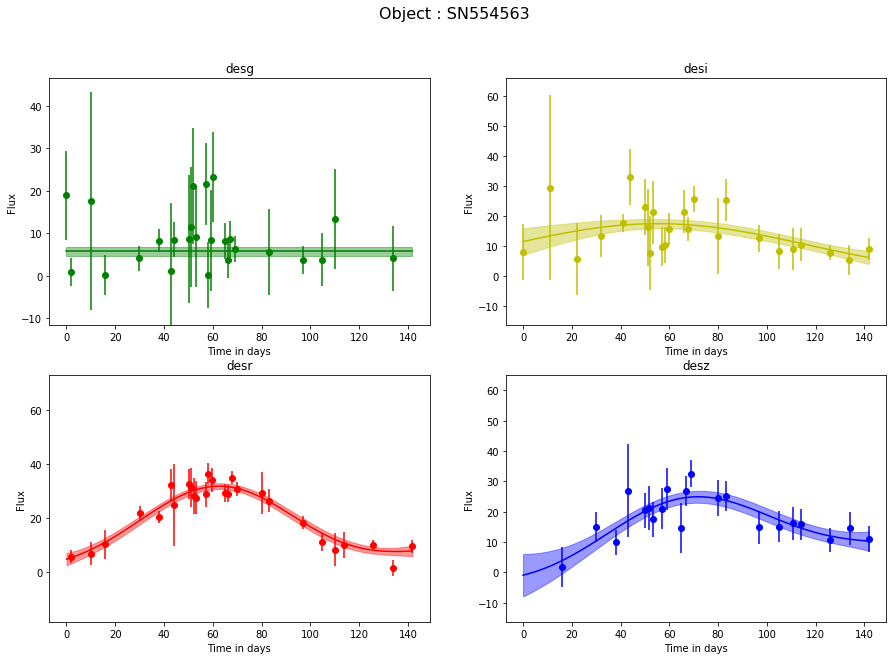

In [13]:
print_filters(df_GP.iloc[0])